# A Bayesian approach to model 'fitting'
### August George - 11/2020
#### Zuckerman Lab - OHSU

These notes were prepared for a class presentation. You will need install the pyMC3 and arviz python libraries to run it.  

## Introduction:

Here we investigate Bayesian inference by using a familiar linear model with noise. Given the uncertainty of the data, we would like to estimate a distribution for each model parameter (e.g. slope, intercept). In Bayesian terms we want the posterior - the conditional probability of the model parameters given the data. 

In this notebook we introduce the basic concepts of Bayes' theorem, and Markov Chain Monte Carlo sampling. We analyze and compare the posterior distributions over a range of conditions for a linear model such as different data set changes. Finally, we examine the credible regions over a range of conditions. 

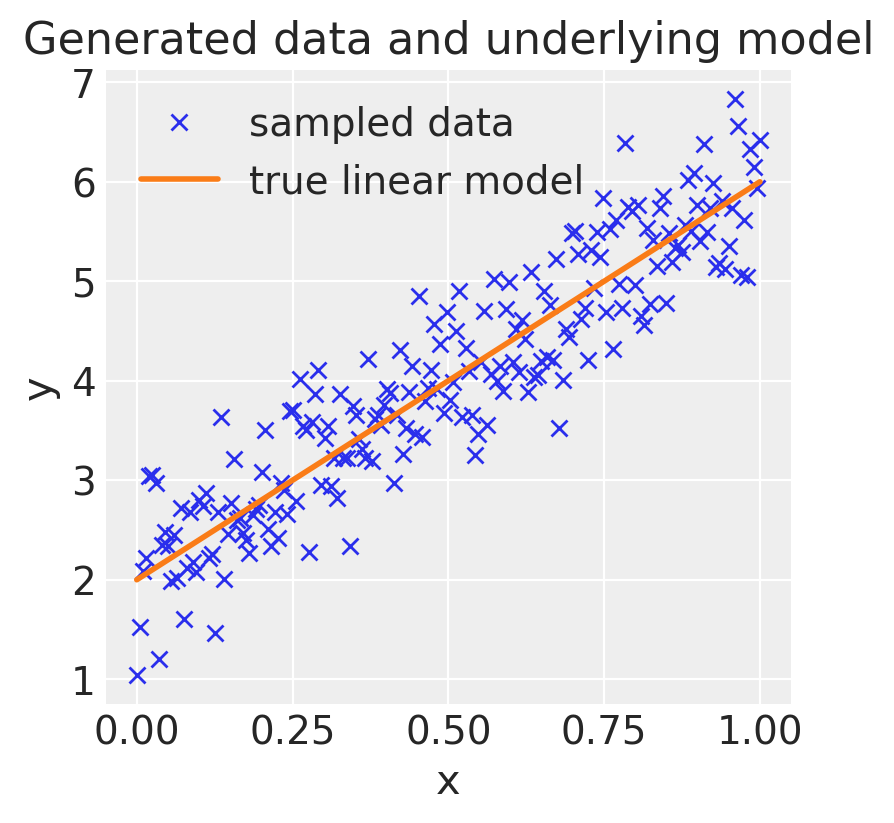

In [50]:
from IPython.display import Image
Image(filename="linear_model.png", width = 400, height = 400)

## Motivation:

Suppose we do an experiment and observe the data above. What model do we expect? How can we find the slope and intercept? Also, how can we characterize the variance in the data?

One common method is linear regression:

+ Provides a *point estimate* of the best fit for the parameters (e.g. maximum likelihood estimation)

An alternative is Bayesian inference:

+ Provides a *distribution* for each model parameter given the data

## Bayes' Theorem:

Bayesian inference is based on Bayes' theorem. Below is a brief explanation to provide intuition on Bayes' theorem. 

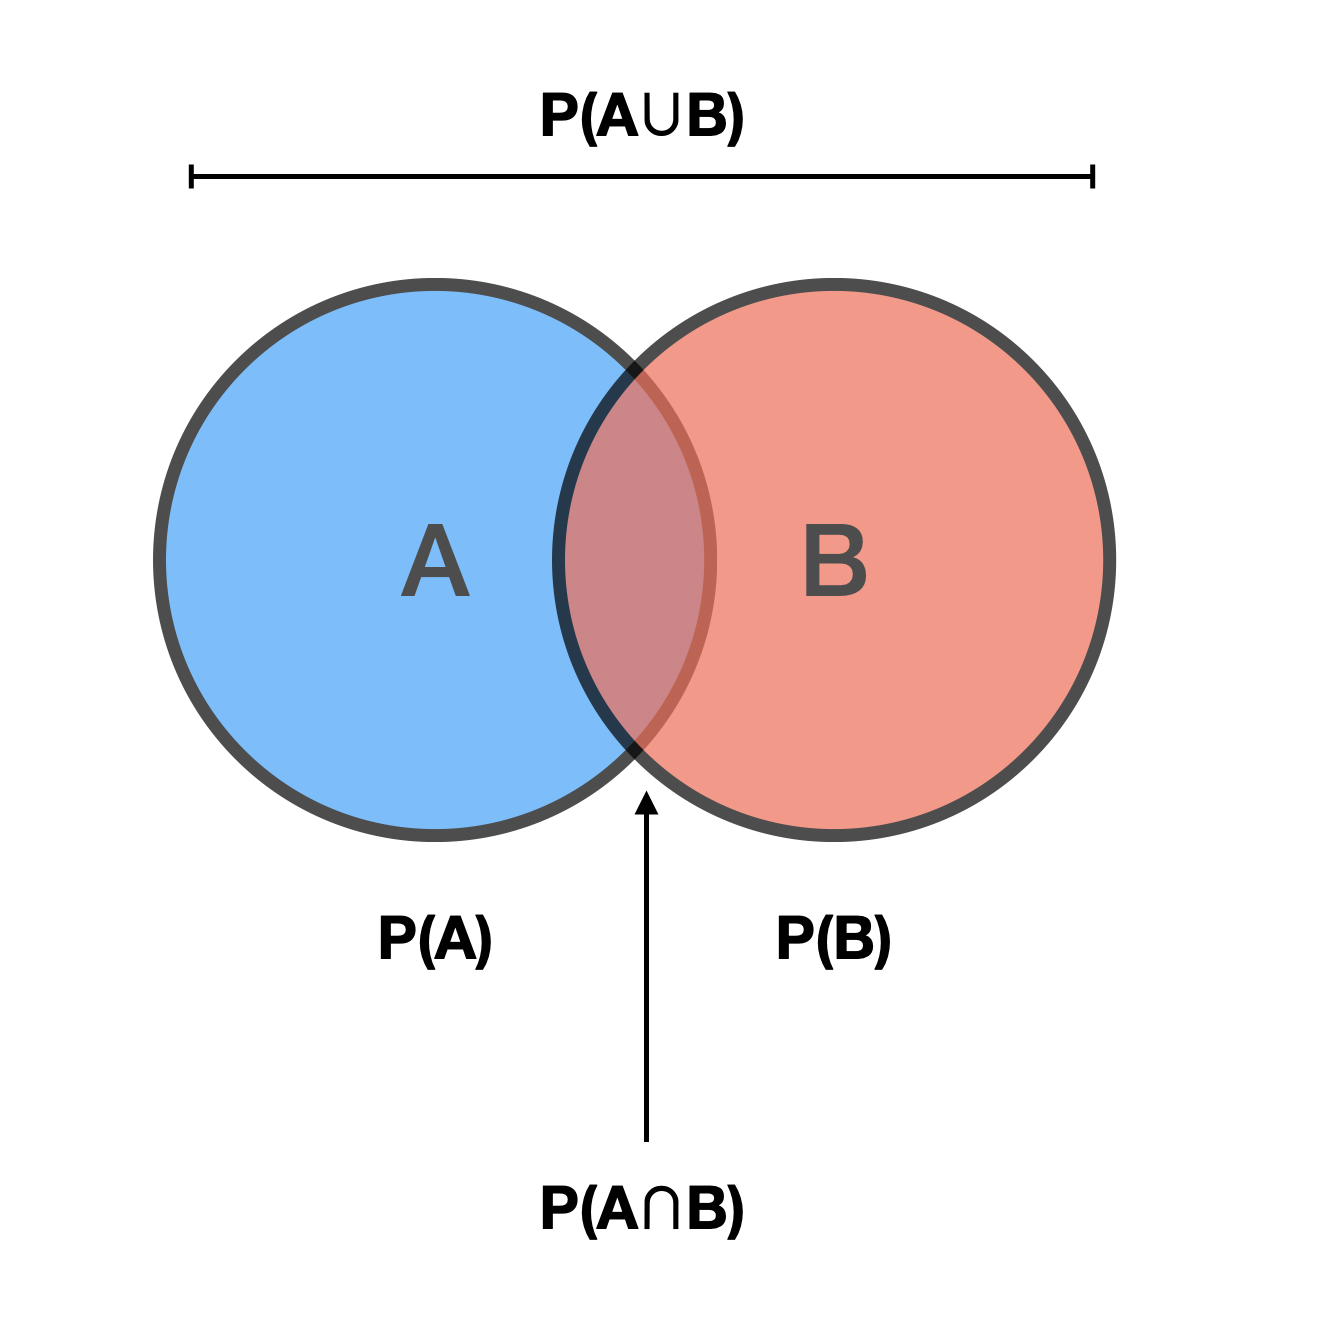

In [3]:
Image(filename="bayes_1.png", width = 400, height = 400)

Suppose there are two events, A, and B, and the probability of either event occuring is P(A) and P(B) respectively. Each circle represents the total probability of event A or B occuring. 

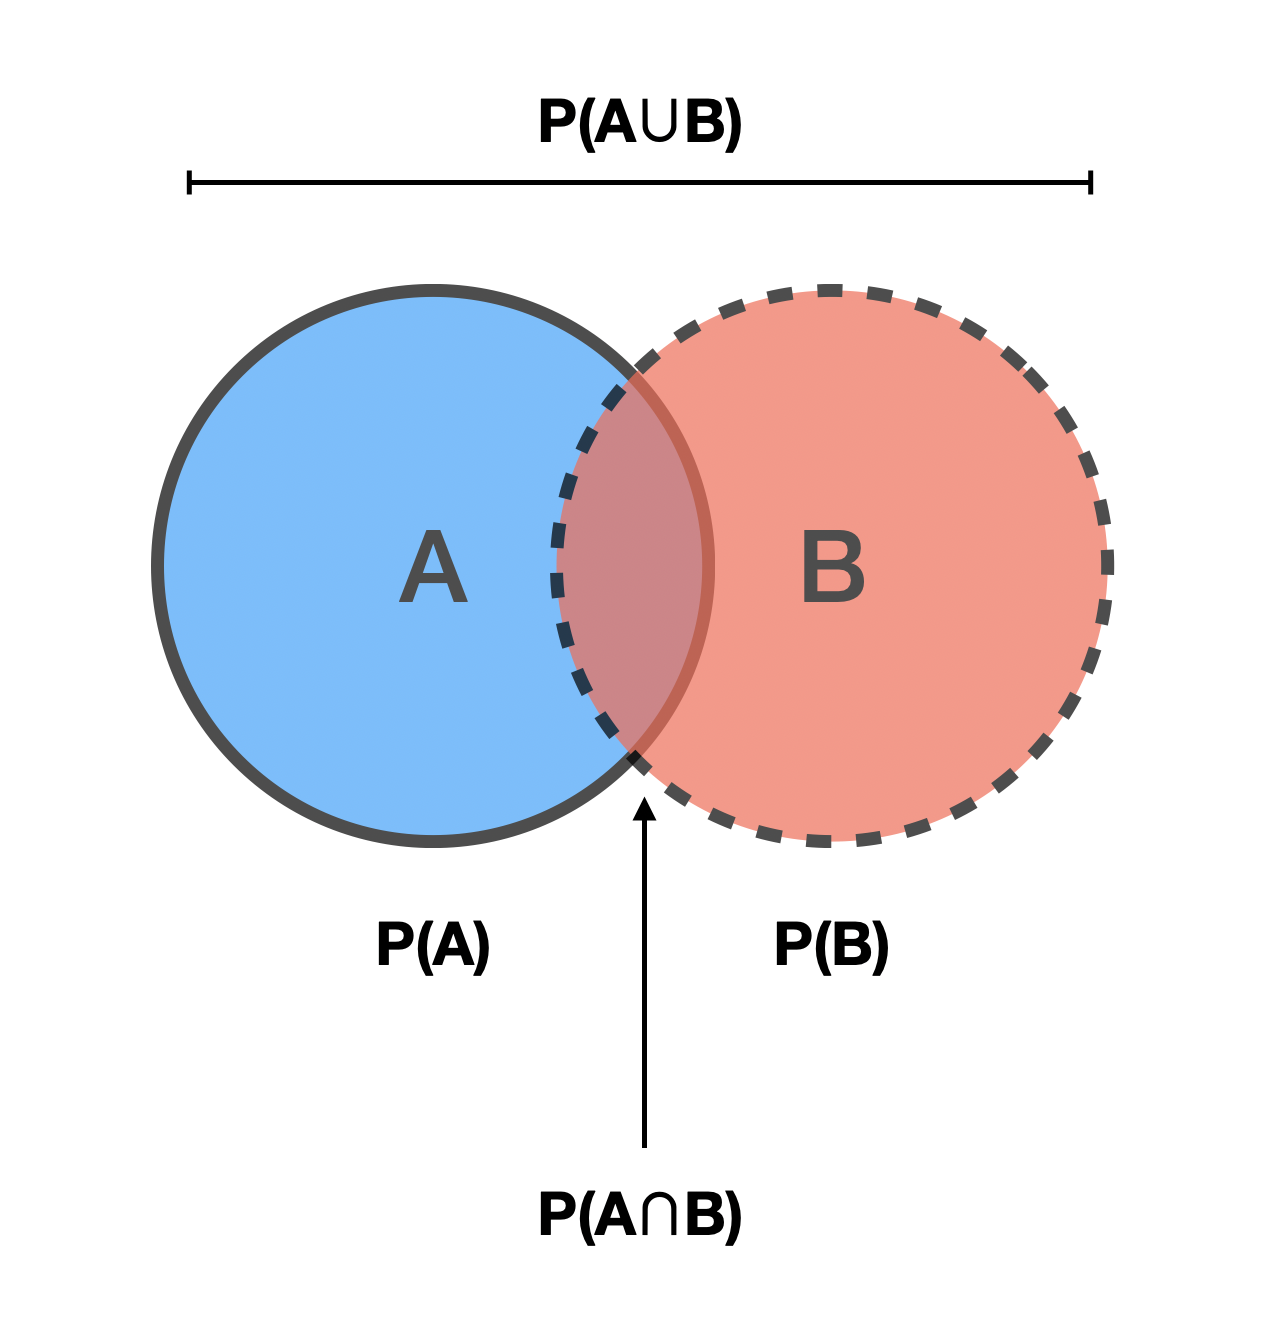

In [4]:
Image(filename="bayes_2.png", width = 400, height = 400)

What is the probability of event 'A' happening, given the event B has happened? 

Since event B happened we are constrainted to the red 'B' circle on the right. The probability that event 'A' happened is the intersection between the 'A' and 'B' circles. The probability that event 'A' happened given event 'B' happened is then the ratio of the intersection of 'A' and 'B', to the total probability of 'B'

More formally: $P(A|B) = \dfrac{P(A\cap B)}{P(B)}$

Similarly for the probabilty of event 'B' happening given event 'A' happened: $P(B|A) = \dfrac{P(A\cap B)}{P(A)}$

Since both the above equations have the 'intersection' term, we can set them equal to eachother to find the common form of Bayes' theorem:

$P(A|B) = \dfrac{P(A\cap B)}{P(B)}  \longrightarrow P(A\cap B) = P(A|B) \cdot P(B)$ 

*and*

$P(B|A) = \dfrac{P(A\cap B)}{P(A)}  \longrightarrow P(A\cap B) = P(B|A) \cdot P(A)$

$ \Rightarrow $ **Bayes' Theorem:** $P(B|A) = \dfrac{P(A|B) \cdot P(B)}{P(A)}$

#### Bayes' theorem using distributions:


Instead of using point estimates, we can reforumlate Bayes' theorem using probability distributions:

$p(\theta | \mathrm{data}) = \dfrac{\mathcal{p}(\mathrm{data} | \theta ) \cdot p(\theta)}{p(\mathrm{data})}$


These dsitributions are commonly refered to as: $posterior = \dfrac{likelihood \cdot prior}{evidence}$

**posterior**, $p(\theta | \mathrm{data})$: probability distribution of the model parameters given the data set

**likelihood**, $\mathcal{p}(\mathrm{data} | \theta )$: probability distribution of the data given a set of parameters

**prior**, $p(\theta)$: probability distribution of the parameters - before using the data

**evidence**, $p(\mathrm{data})$: probability distribution of the data - before using the parameters

## Model 'fitting' w/ Bayes' Theorem

We want to find the posterior, the *distribution* of parameters given the data set. 

Calculating this directly is often difficult because of the evidence term:
$p(\mathrm{data}) = {\displaystyle \int_{\theta}^{} p(\mathrm{data} | \theta ) p(\theta)  \ \mathrm{d}\theta }$

The evidence distribution is a normalization term, so we can omit it and rewrite Bayes' theorem using a proportionalilty constant

**Bayes' Theorem:** $p(\theta | \mathrm{data}) \propto p(\mathrm{data} | \theta ) \cdot p(\theta)$

#### Markov chain Monte Carlo (MCMC)

One way to find the posterior is to use Markov Chain Monte Carlo sampling

Here the approach is to generate a Markov chain with a stationary (equilibrium) distribution that is proportional to the desired (i.e. $p(\theta | \mathrm{data})$) distribution. 

With enough samples, this Markov chain will also be proportional to the desired distribution. 

A common method for this is the random walk Metropolis-Hastings algorithm.

### Random walk Metropolis-Hastings Monte Carlo 


1. Intialization: Choose initial $\theta_{t=0}$ 
2. For $t = 1,...,m$:  
    1. Select canditate $\theta^{*}$ from a symmetric (e.g. Gaussian) distribution: $q(\theta^{*}|\theta_{t-1})$
    2. Calculate acceptance ratio: $\alpha = \dfrac{p(\mathrm{data} | \theta^{*} ) \cdot p(\theta^{*})}{p(\mathrm{data} | \theta_{t-1} ) \cdot p(\theta_{t-1})}$
    3. For $\alpha \geq 1$:
        1. accept candidate: $\theta_{t} \leftarrow \theta^*$
       
       For  $0 < \alpha < 1$:
        1. accept candidate: $\theta_{t} \leftarrow \theta^*$ with probability $\alpha$
        2. reject candidate: $\theta_{t} \leftarrow \theta_{t-1}$ with probability $1-\alpha$

### Useful definitions:

##### Gaussian (Normal) distribution: $p(x) = \dfrac{1}{\sigma \sqrt{2 \pi}} e^{-\frac{1}{2} \left(\frac{x-\mu}{\sigma}\right)^2 }$

# Linear model example

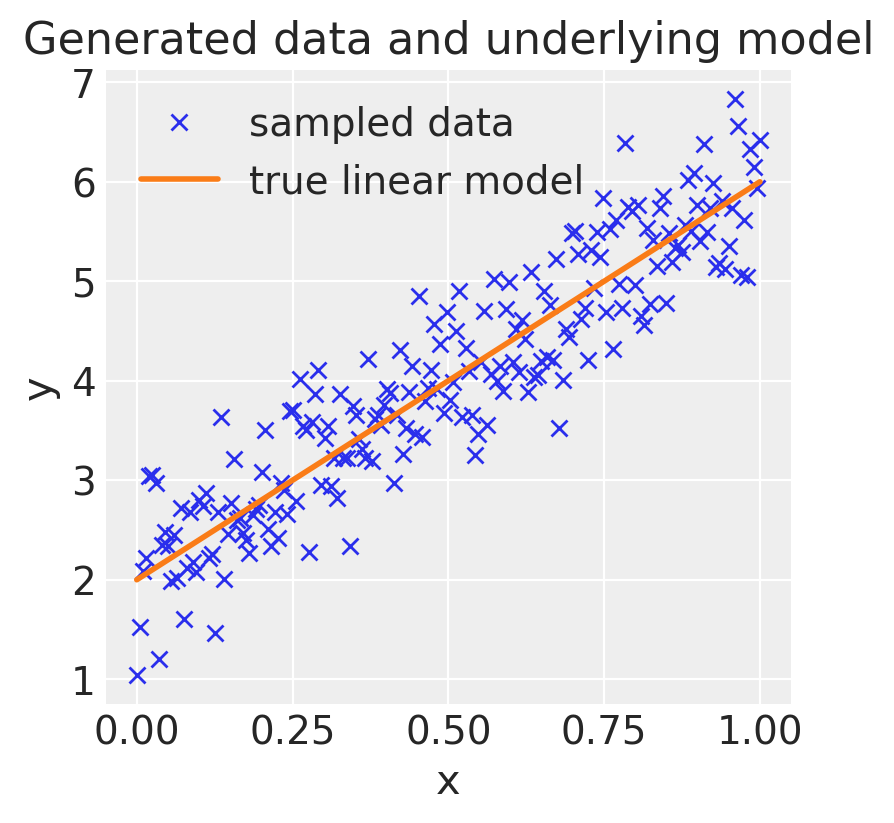

In [3]:
Image(filename="linear_model.png", width = 400, height = 400)

We want to find the model parameters that best fit the observed data. Let's assume a Gaussian distribution for the noise with a mean of zero and constant variance. For a linear model with this noise distribution we will need to find the posterior distribution for the slope, intercept, and noise variance.

Assumed model: $y_{i} = (ax_{i} + b) + \epsilon_{i}$, 

where $\epsilon$ is drawn from a Normal distribution: $N(\mu_{\epsilon}=0, \sigma_{\epsilon}=\sigma_{\mathrm{True}})$.

Parameters we want to estimate, $\theta = (a, b, \sigma_{\mathrm{True}})$

To use the Markov Chain Monte Carlo sampling we will need to guess a prior and calculate the likelihood. Let's assume Guassian priors for each parameter. The likelihood is calculated by combining the probabilities of each observed datapoint values and the estimated parameter values. In this example the liklihood is calculated from a Gaussian distribution with a mean of the estimated output (i.e. $ax_{i}+b$) and variance. 

Priors: Choose distributions, $p(\theta) = p(a)\cdot p(b) \cdot p(\sigma_{\epsilon})$ 

Likelihood: $p(\mathrm{data} | \theta ) = p(y | (a,b,\sigma_{\epsilon}) )$ 
$ = \prod_{i} p(y_{i} | (a,b,\sigma_{\epsilon}) = \prod_{i} \dfrac{1}{\sigma \sqrt{2 \pi}} e^{-\frac{1}{2} \left(\frac{y_{i}-(ax_{i}+b)}{\sigma}\right)^2 }$


## Code example - intial linear model:

To demonstrate Bayesian inference we use Python with the pyMC3 library using a Markov Chain Monte Carlo sampler - NUTS.  

For the initial simulation we generate the data using 200 data points, a *slope* of 4, *intercept* of 2, and *standard deviation* of 0.5 for the Gaussian noise ( mean of zero). 

We first use a 'Normal' set of prior distributions:

$p(a) = p(b) = N(\mu=0, \sigma=20)$

$p(\sigma) = logN(\mu=0, \sigma=20)$


For reference:
**pyMC3 code example ** https://docs.pymc.io/notebooks/GLM-linear.html

In [1]:
### Import libraries
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
from pymc3 import  *
import warnings
warnings.filterwarnings('ignore')


### Set display options
%config InlineBackend.figure_format = 'retina'
az.style.use('arviz-darkgrid')

In [2]:
def generate_data(slope=4, intercept=2, sigma=0.5, data_size=200):
    
    ### True parameters for linear model
    true_slope = slope    
    true_intercept = intercept
    true_sigma = sigma

    ### Generate synthetic data 
    size = data_size
    x = np.linspace(0, 1, size)
    true_regression_line = true_intercept + true_slope * x  # y = a + b*x
    y = true_regression_line + np.random.normal(scale=true_sigma, size=size)  # add noise
    return (x,y,true_regression_line)

In [3]:
def sampler(x,y, prior = 'normal', n_samples=200, chains=3, v=True):
    
    ### Construct model using pyMC3
    with Model() as model: 

        ### Define priors
        if prior == 'normal':
            sigma = Lognormal('sigma', 0, sigma=20)
            Intercept = Normal('Intercept', 0, sigma=20)
            x_coeff = Normal('slope', 0, sigma=20)
        elif prior == 'uniform':
            sigma = Uniform('sigma', 0,1)
            Intercept = Uniform('Intercept',-5, 5)
            x_coeff = Uniform('slope', -5, 5)
            
        ### Define likelihood
        likelihood = Normal('y', mu=Intercept + x_coeff * x,
                            sigma=sigma, observed=y)
        ### Inference
        if v:  # show progress bar
            trace = sample(n_samples, chains=chains, tune=2000) # draw posterior samples using NUTS 
        else: 
            trace = sample(n_samples, chains=chains, tune=2000, progressbar=False) # draw posterior samples using NUTS 
        
    return trace

In [7]:
# Linear model (example 1) 
# data points = 200, slope = 4, intercept = 2, sigma = 0.5, prior -> normal distributions

x,y,y_true = generate_data()
trace = sampler(x,y, chains = 3)

Sampling 3 chains, 0 divergences: 100%|██████████| 6600/6600 [00:02<00:00, 3131.63draws/s]


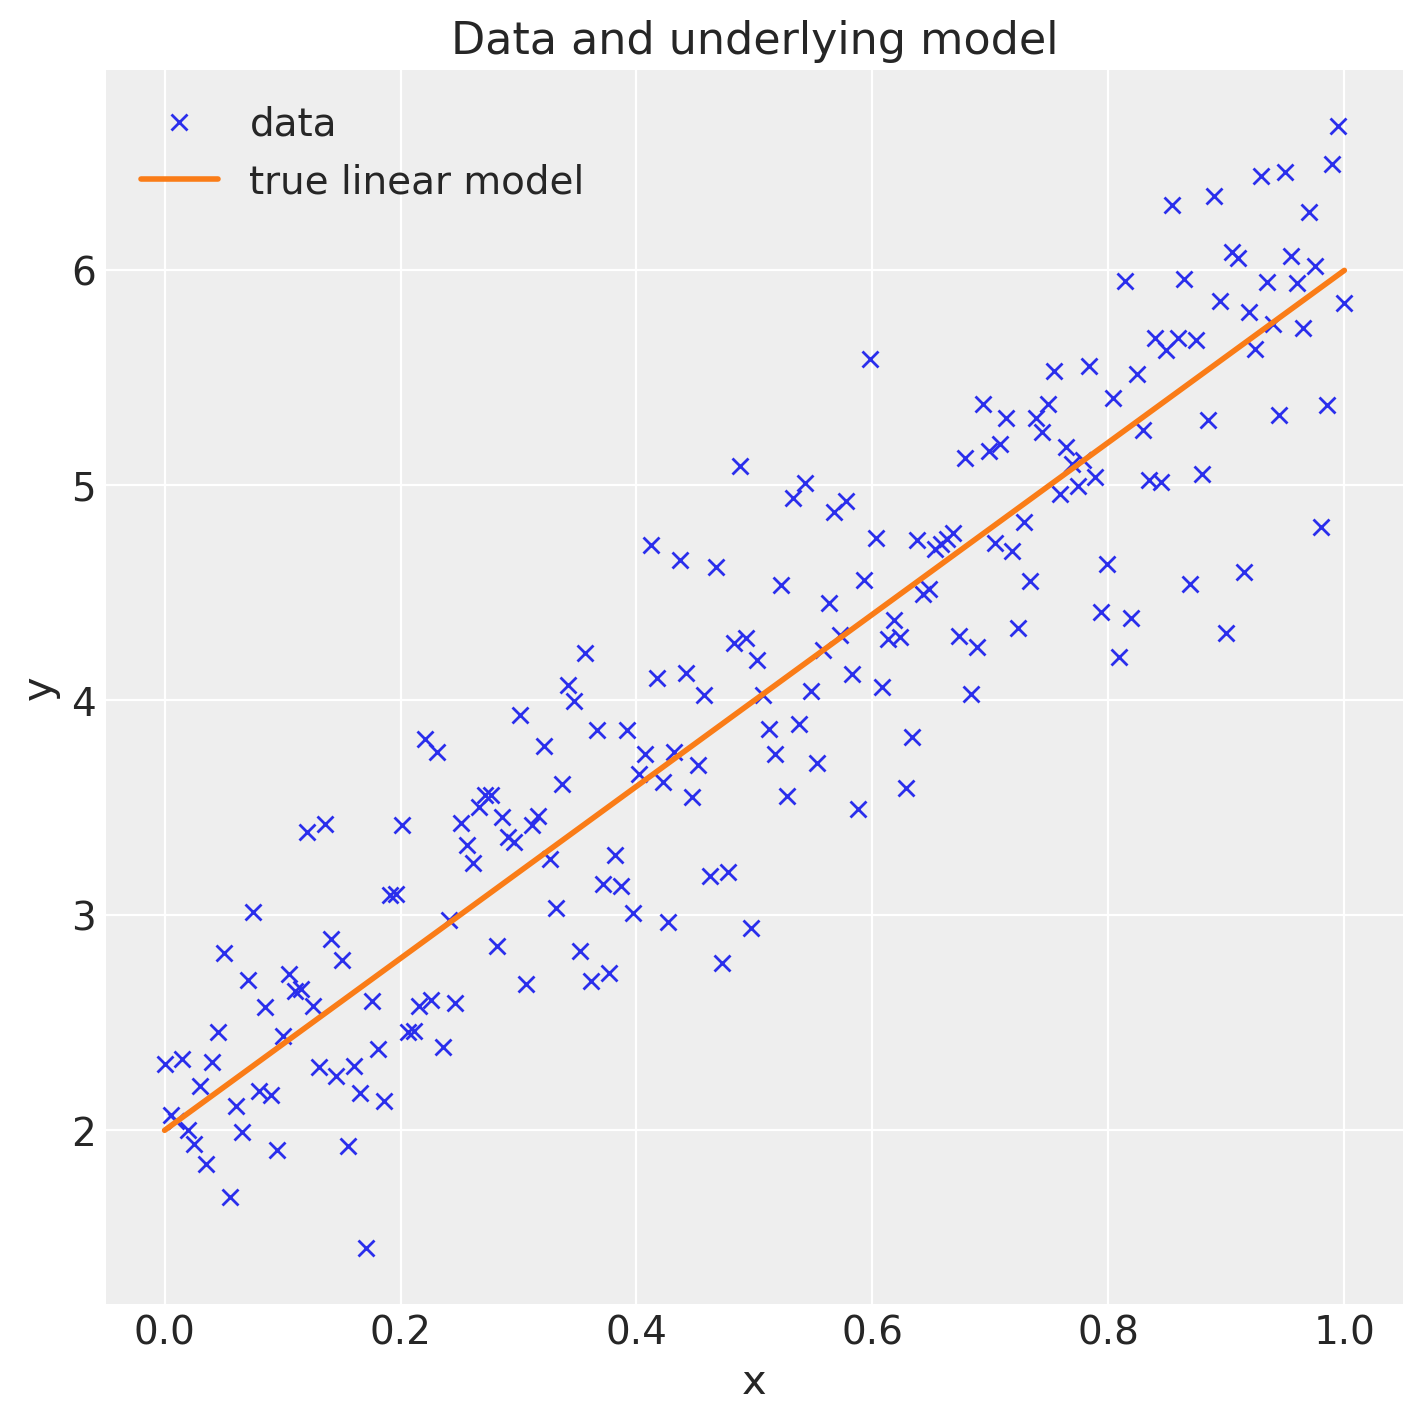

In [22]:
### Plot linear model w/ data
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, xlabel='x', ylabel='y', title='Data and underlying model')
ax.plot(x, y, 'x', label='data');
ax.plot(x, y_true, label='true linear model', lw=2.);
plt.legend(loc=0);

### MCMC Traces

Below we trace the (marginal) posterior distributions (left) and MCMC parameter values (right) for each parameter using three chains.

The mean for intercept, slope, and sigma posterior distributions are near the true values of 2, 4, and 0.5 respectively. 

The MCMC parameter values are stable over the course of the sampling - suggesting that it is indeed a stationary distribution. 

<Figure size 700x700 with 0 Axes>

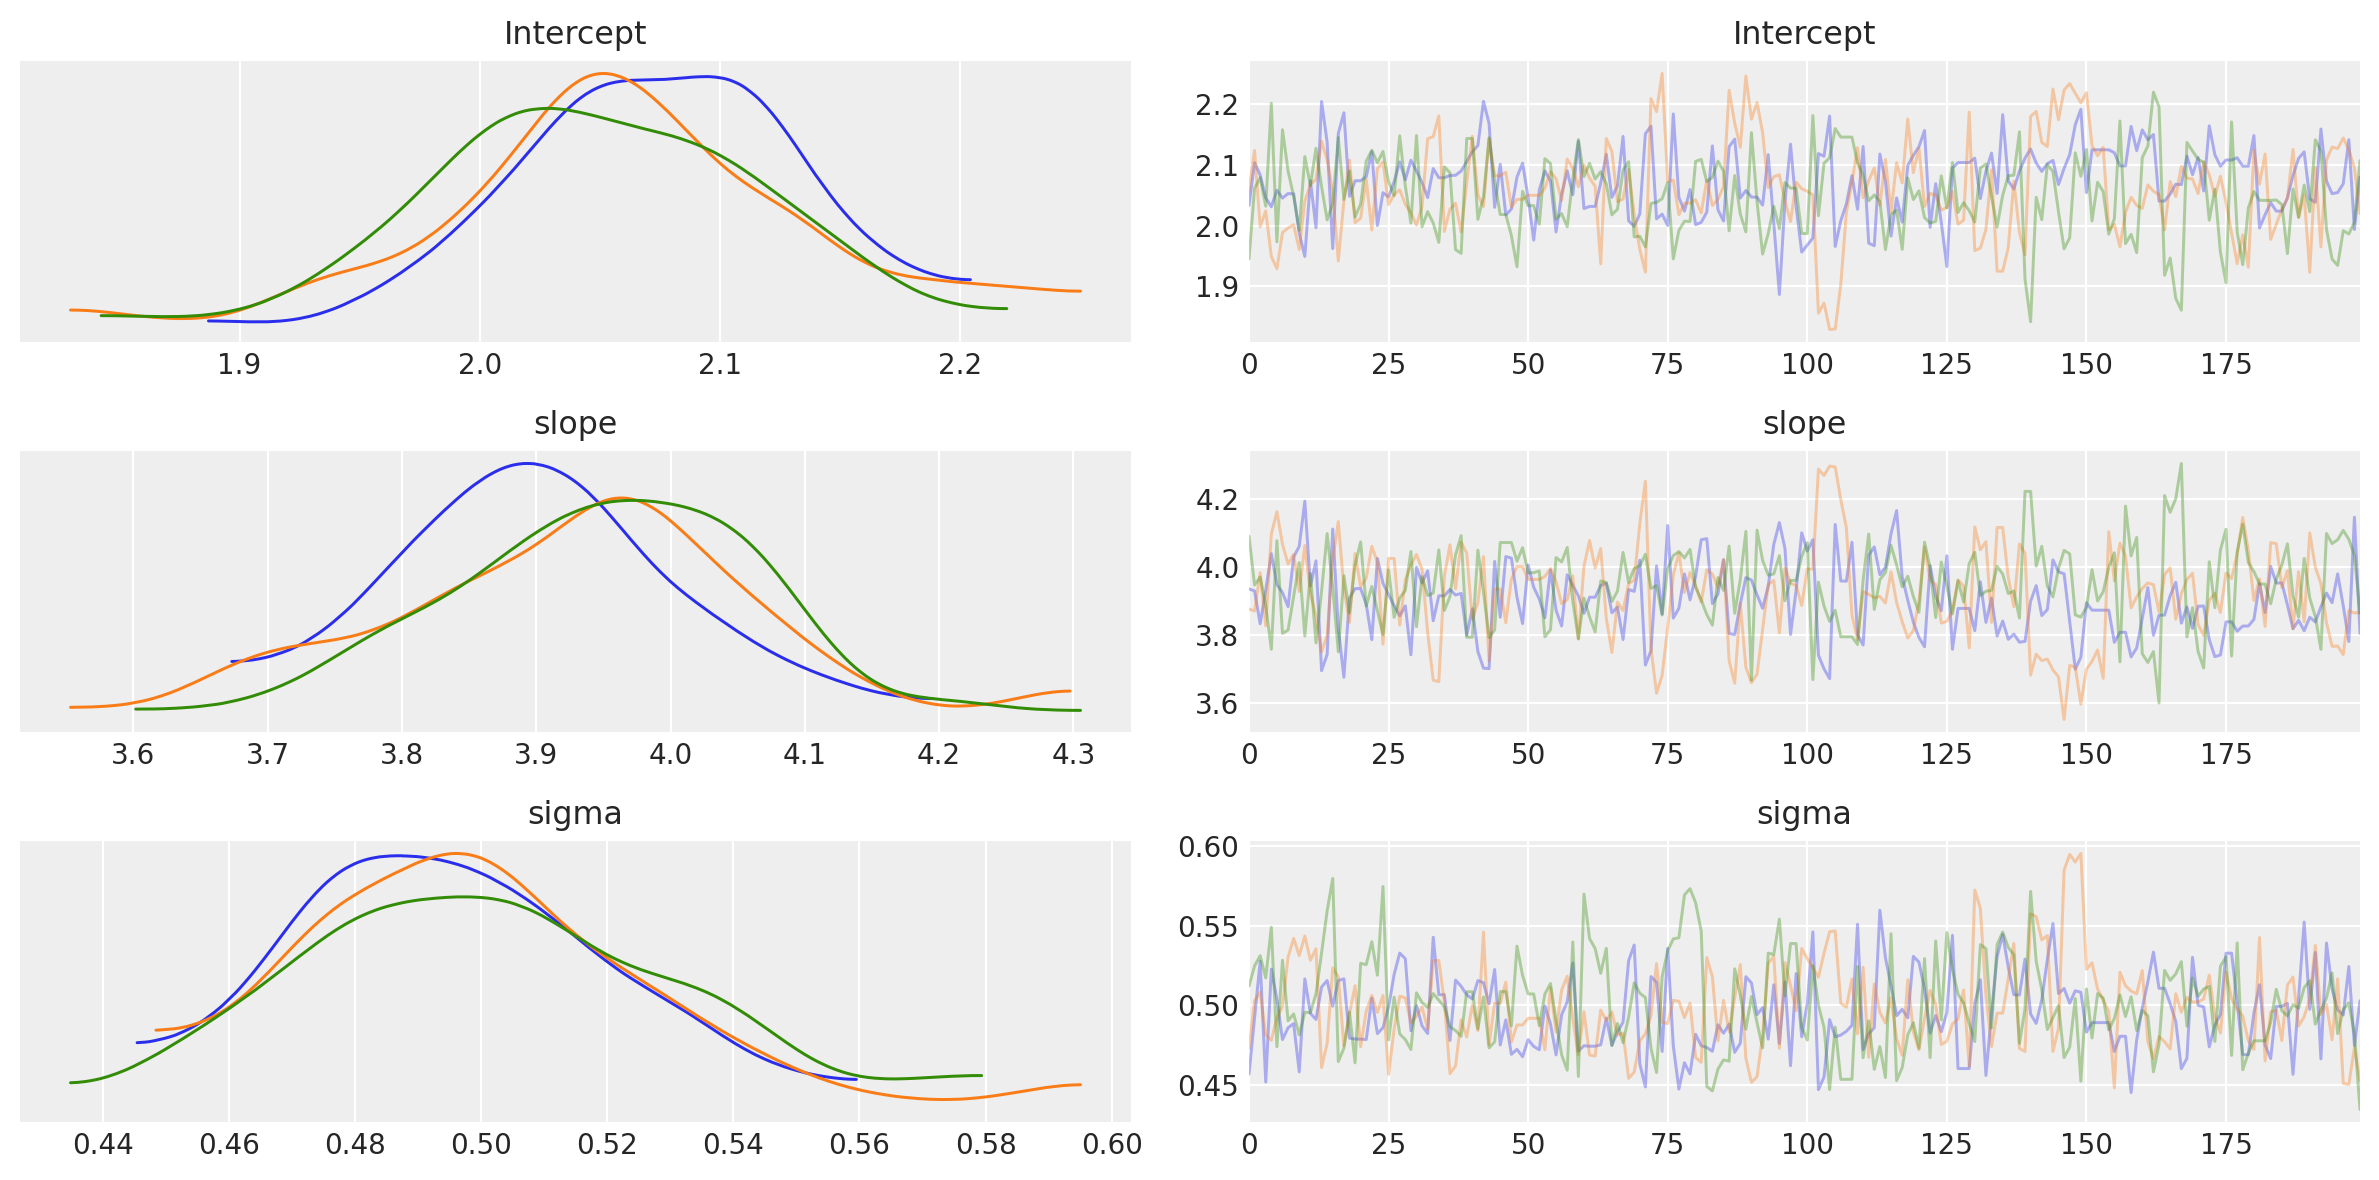

In [23]:
### Plot traces
plt.figure(figsize=(7, 7))
az.plot_trace(trace);
plt.tight_layout();

## Posterior distributions with 95% high density interval (credible region)

Below we plot the (marginal) posterior distributions for the intercept, slope, and sigma for a single chain with the mean and 95% high density interval (~credible region).

<Figure size 700x700 with 0 Axes>

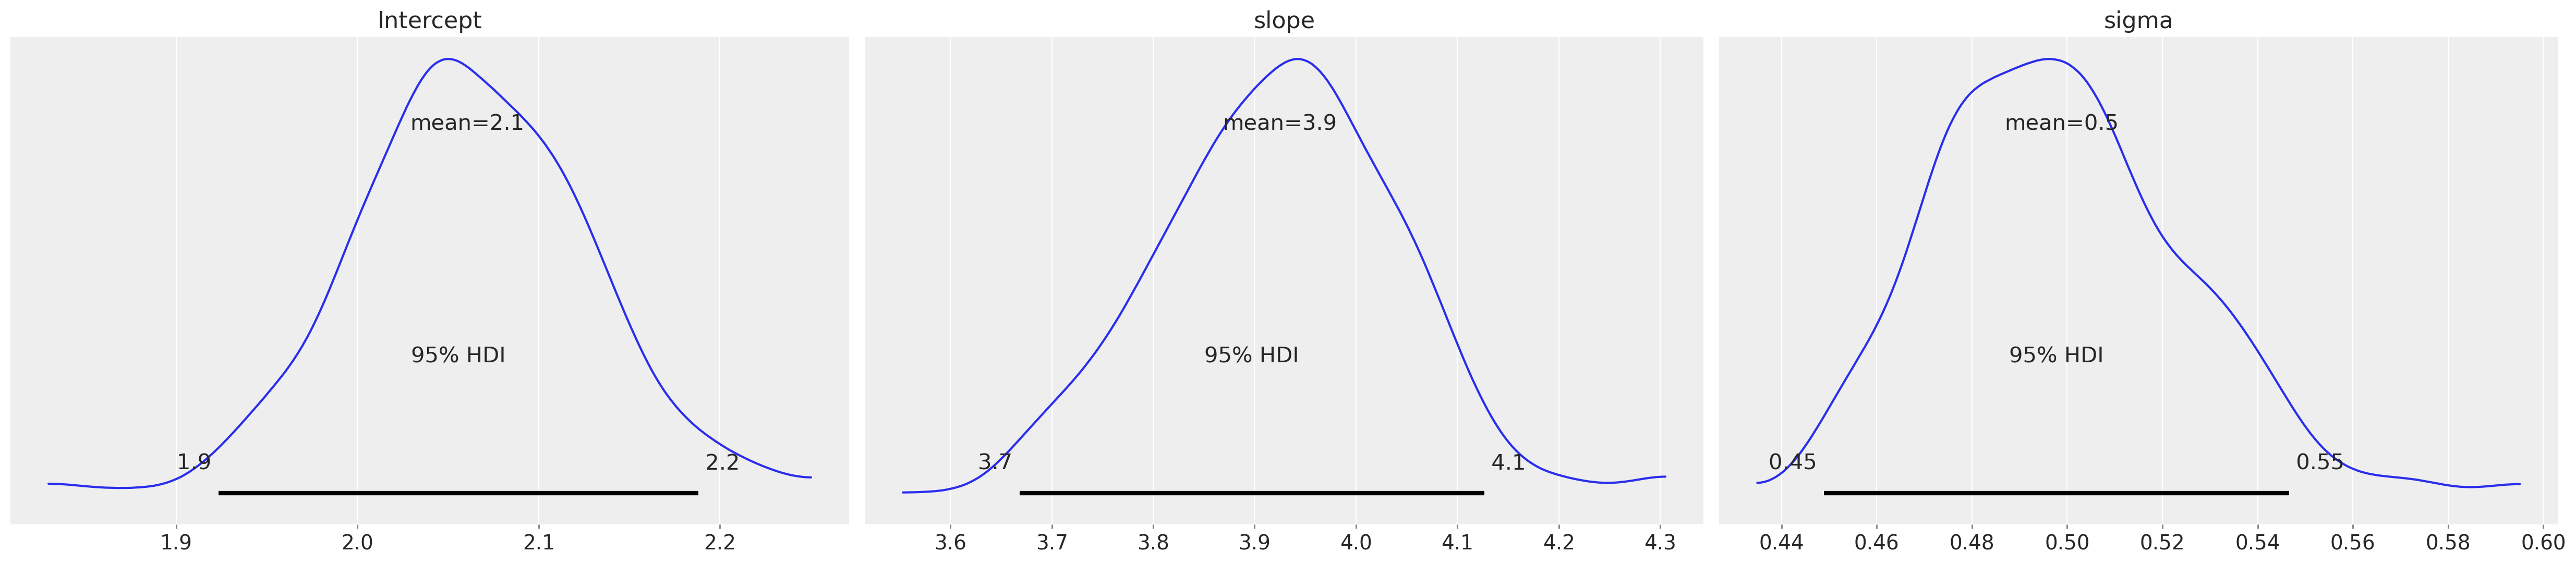

In [24]:
### Plot posterior w/ credible region
plt.figure(figsize=(7, 7))
az.plot_posterior(trace, hdi_prob=0.95);
plt.tight_layout();

In [5]:
### function to graph different models together for comparison

def graph_comparisons(traces, m_names, p_names=['sigma', 'Intercept', 'slope']):       
    for i in range(len(p_names)):
        plt.figure(figsize=(7, 7)) 
        ax = az.plot_forest(traces,  
                    kind='ridgeplot',
                    var_names=p_names[i],
                    model_names = m_names,
                    combined=True,
                    ridgeplot_overlap=5,
                    ridgeplot_truncate=False,
                    hdi_prob = 0.95,
                    ridgeplot_quantiles = [.25,.5,.75],
                    colors=['blue', 'red', 'green'])        
        plt.tight_layout();
        ax[0].set_title('Comparing posterior distributions')

## Altering the standard deviation of the observed data

How do the posterior distributions change if the observed data has more or less variance? 

Below we use the same initial linear model above to estimate the posteriors for each parameter - except with different sigmas (0.5, 1.0, 2.0). The posteriors are then plotted for comparision. As expected, posterior distributions 'flatten' and become less informative as the variance of the data increases. 

Only 200 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [slope, Intercept, sigma]
Sampling chain 0, 0 divergences: 100%|██████████| 2200/2200 [00:01<00:00, 1154.96it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 200 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [slope, Intercept, sigma]
Sampling chain 0, 0 divergences: 100%|██████████| 2200/2200 [00:01<00:00, 1139.59it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 200 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [slope, Intercept, sigma]
Sampling chain 0, 0 divergences: 100%|██████████| 2200/2200 [00:01<00:00, 1158.63it/s]
Only one chain was sampled, this makes it impo

<Figure size 700x700 with 0 Axes>

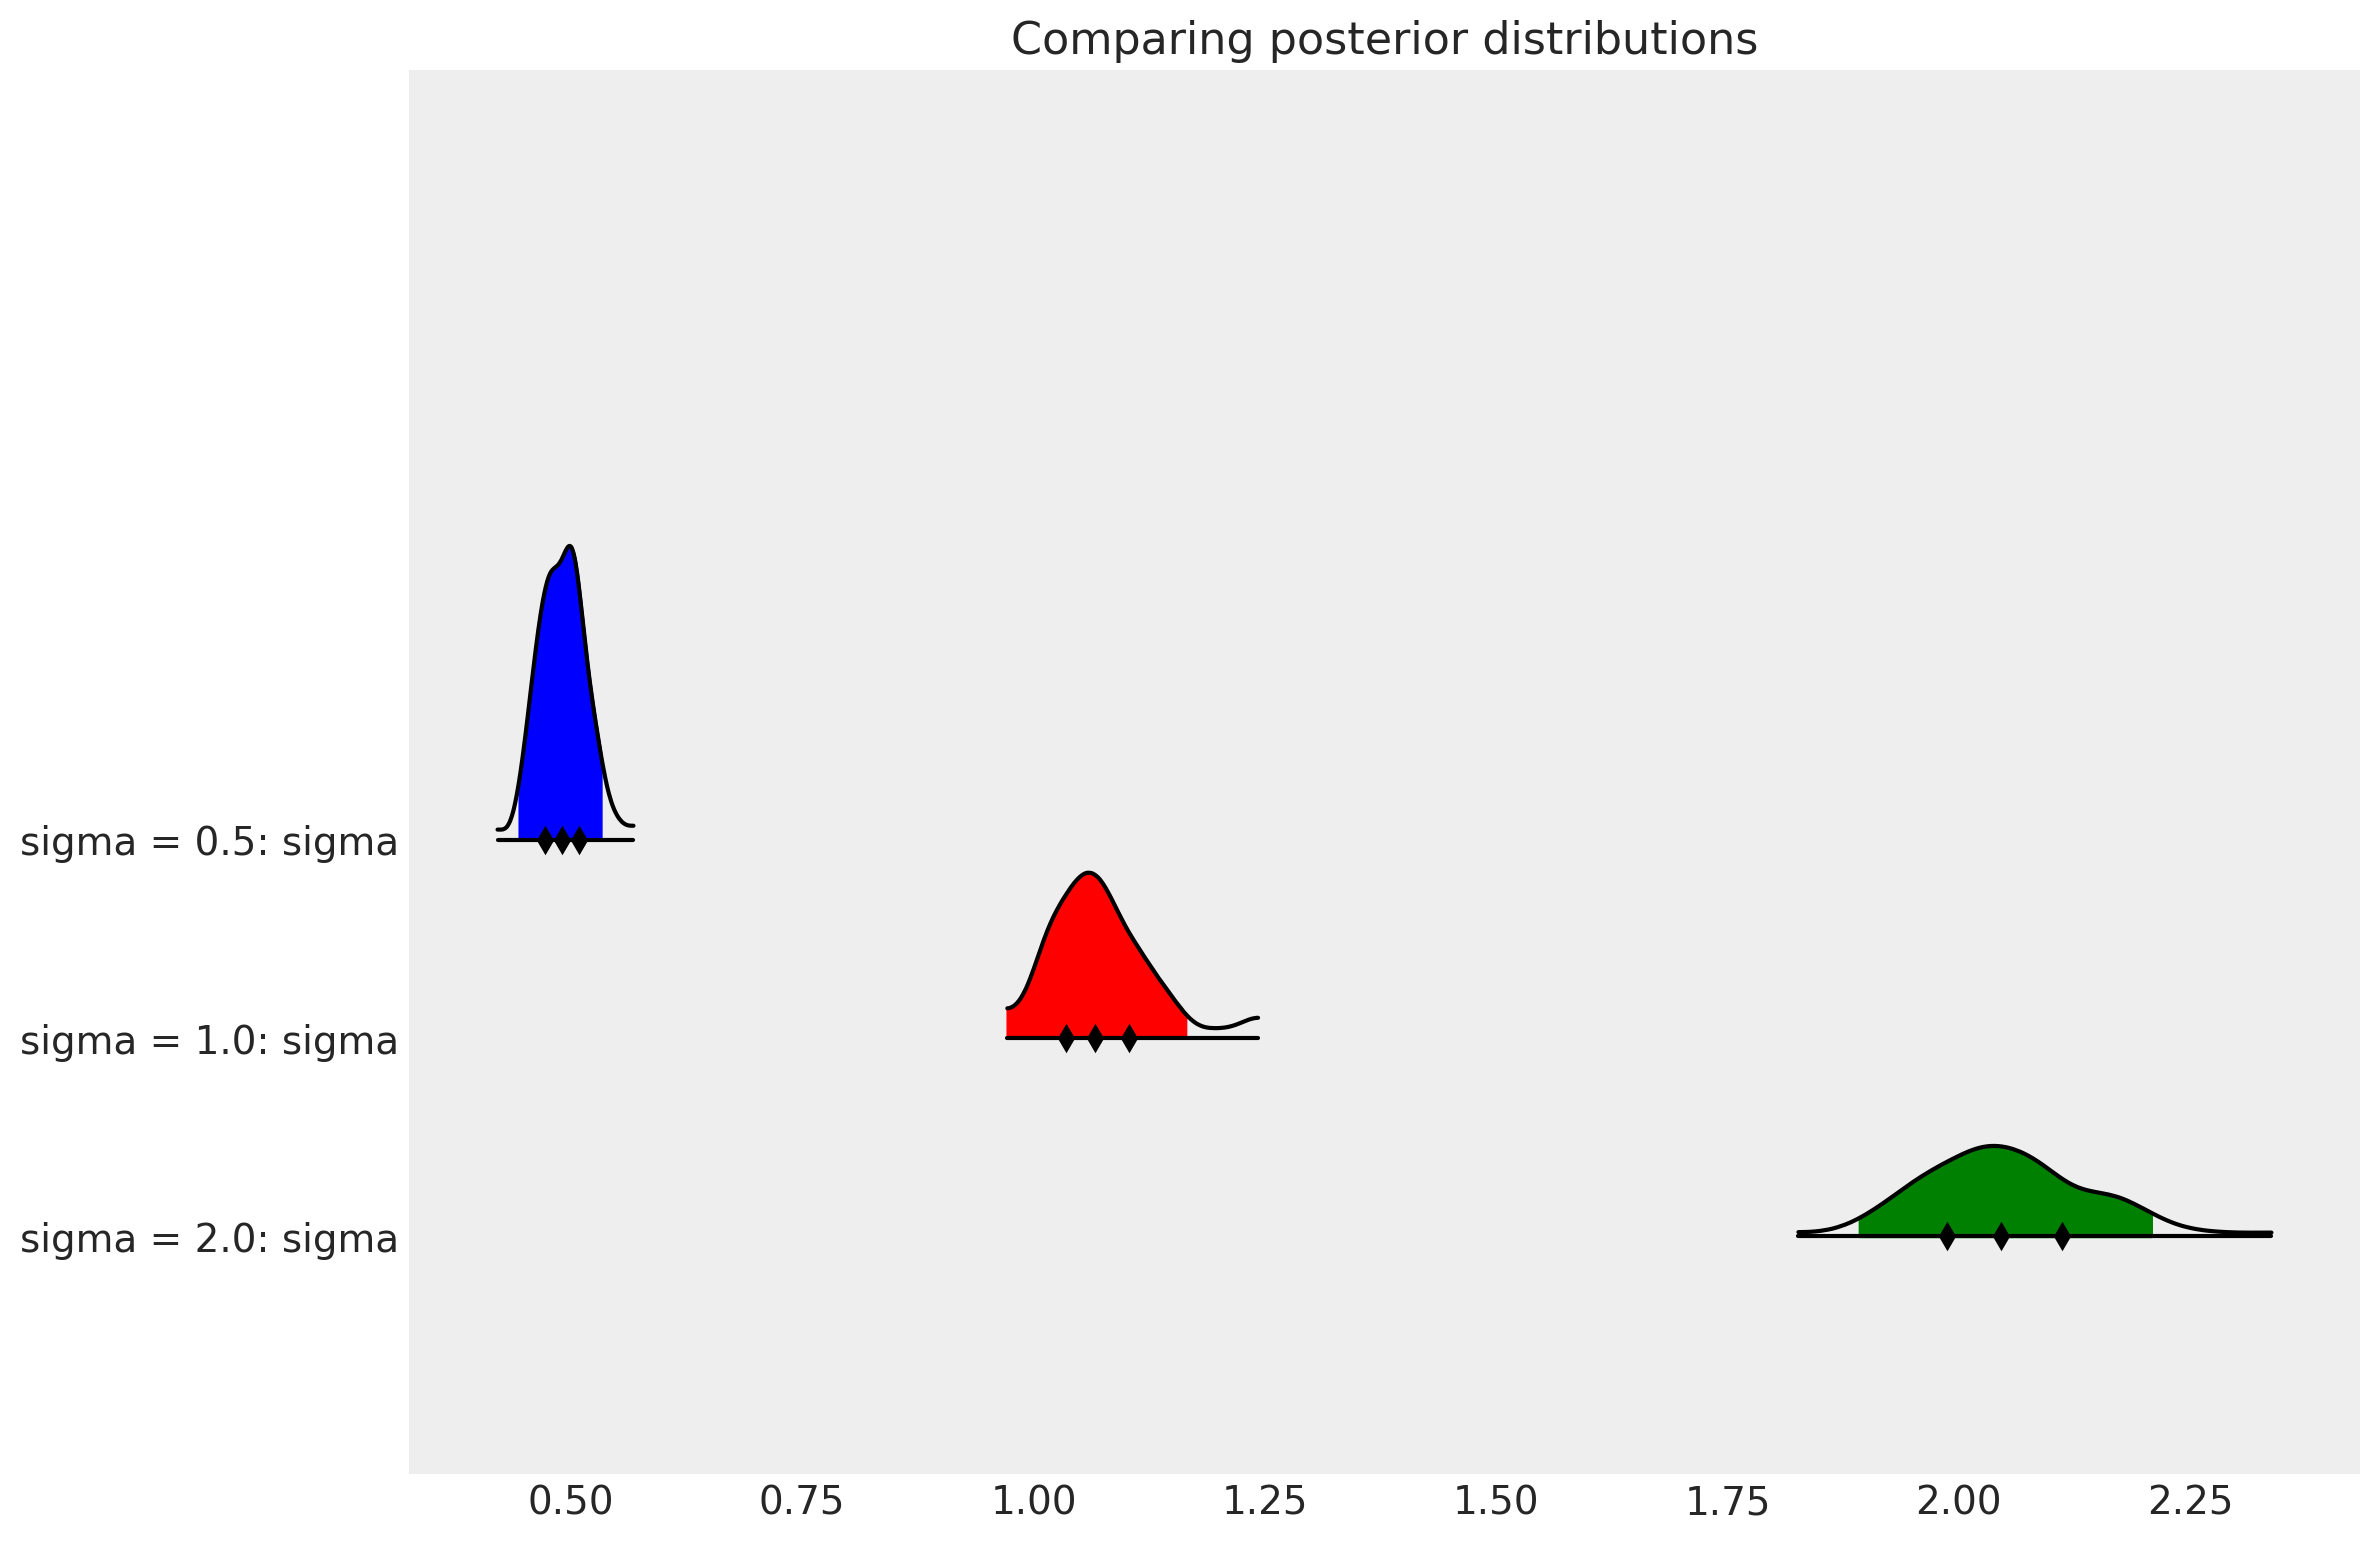

<Figure size 700x700 with 0 Axes>

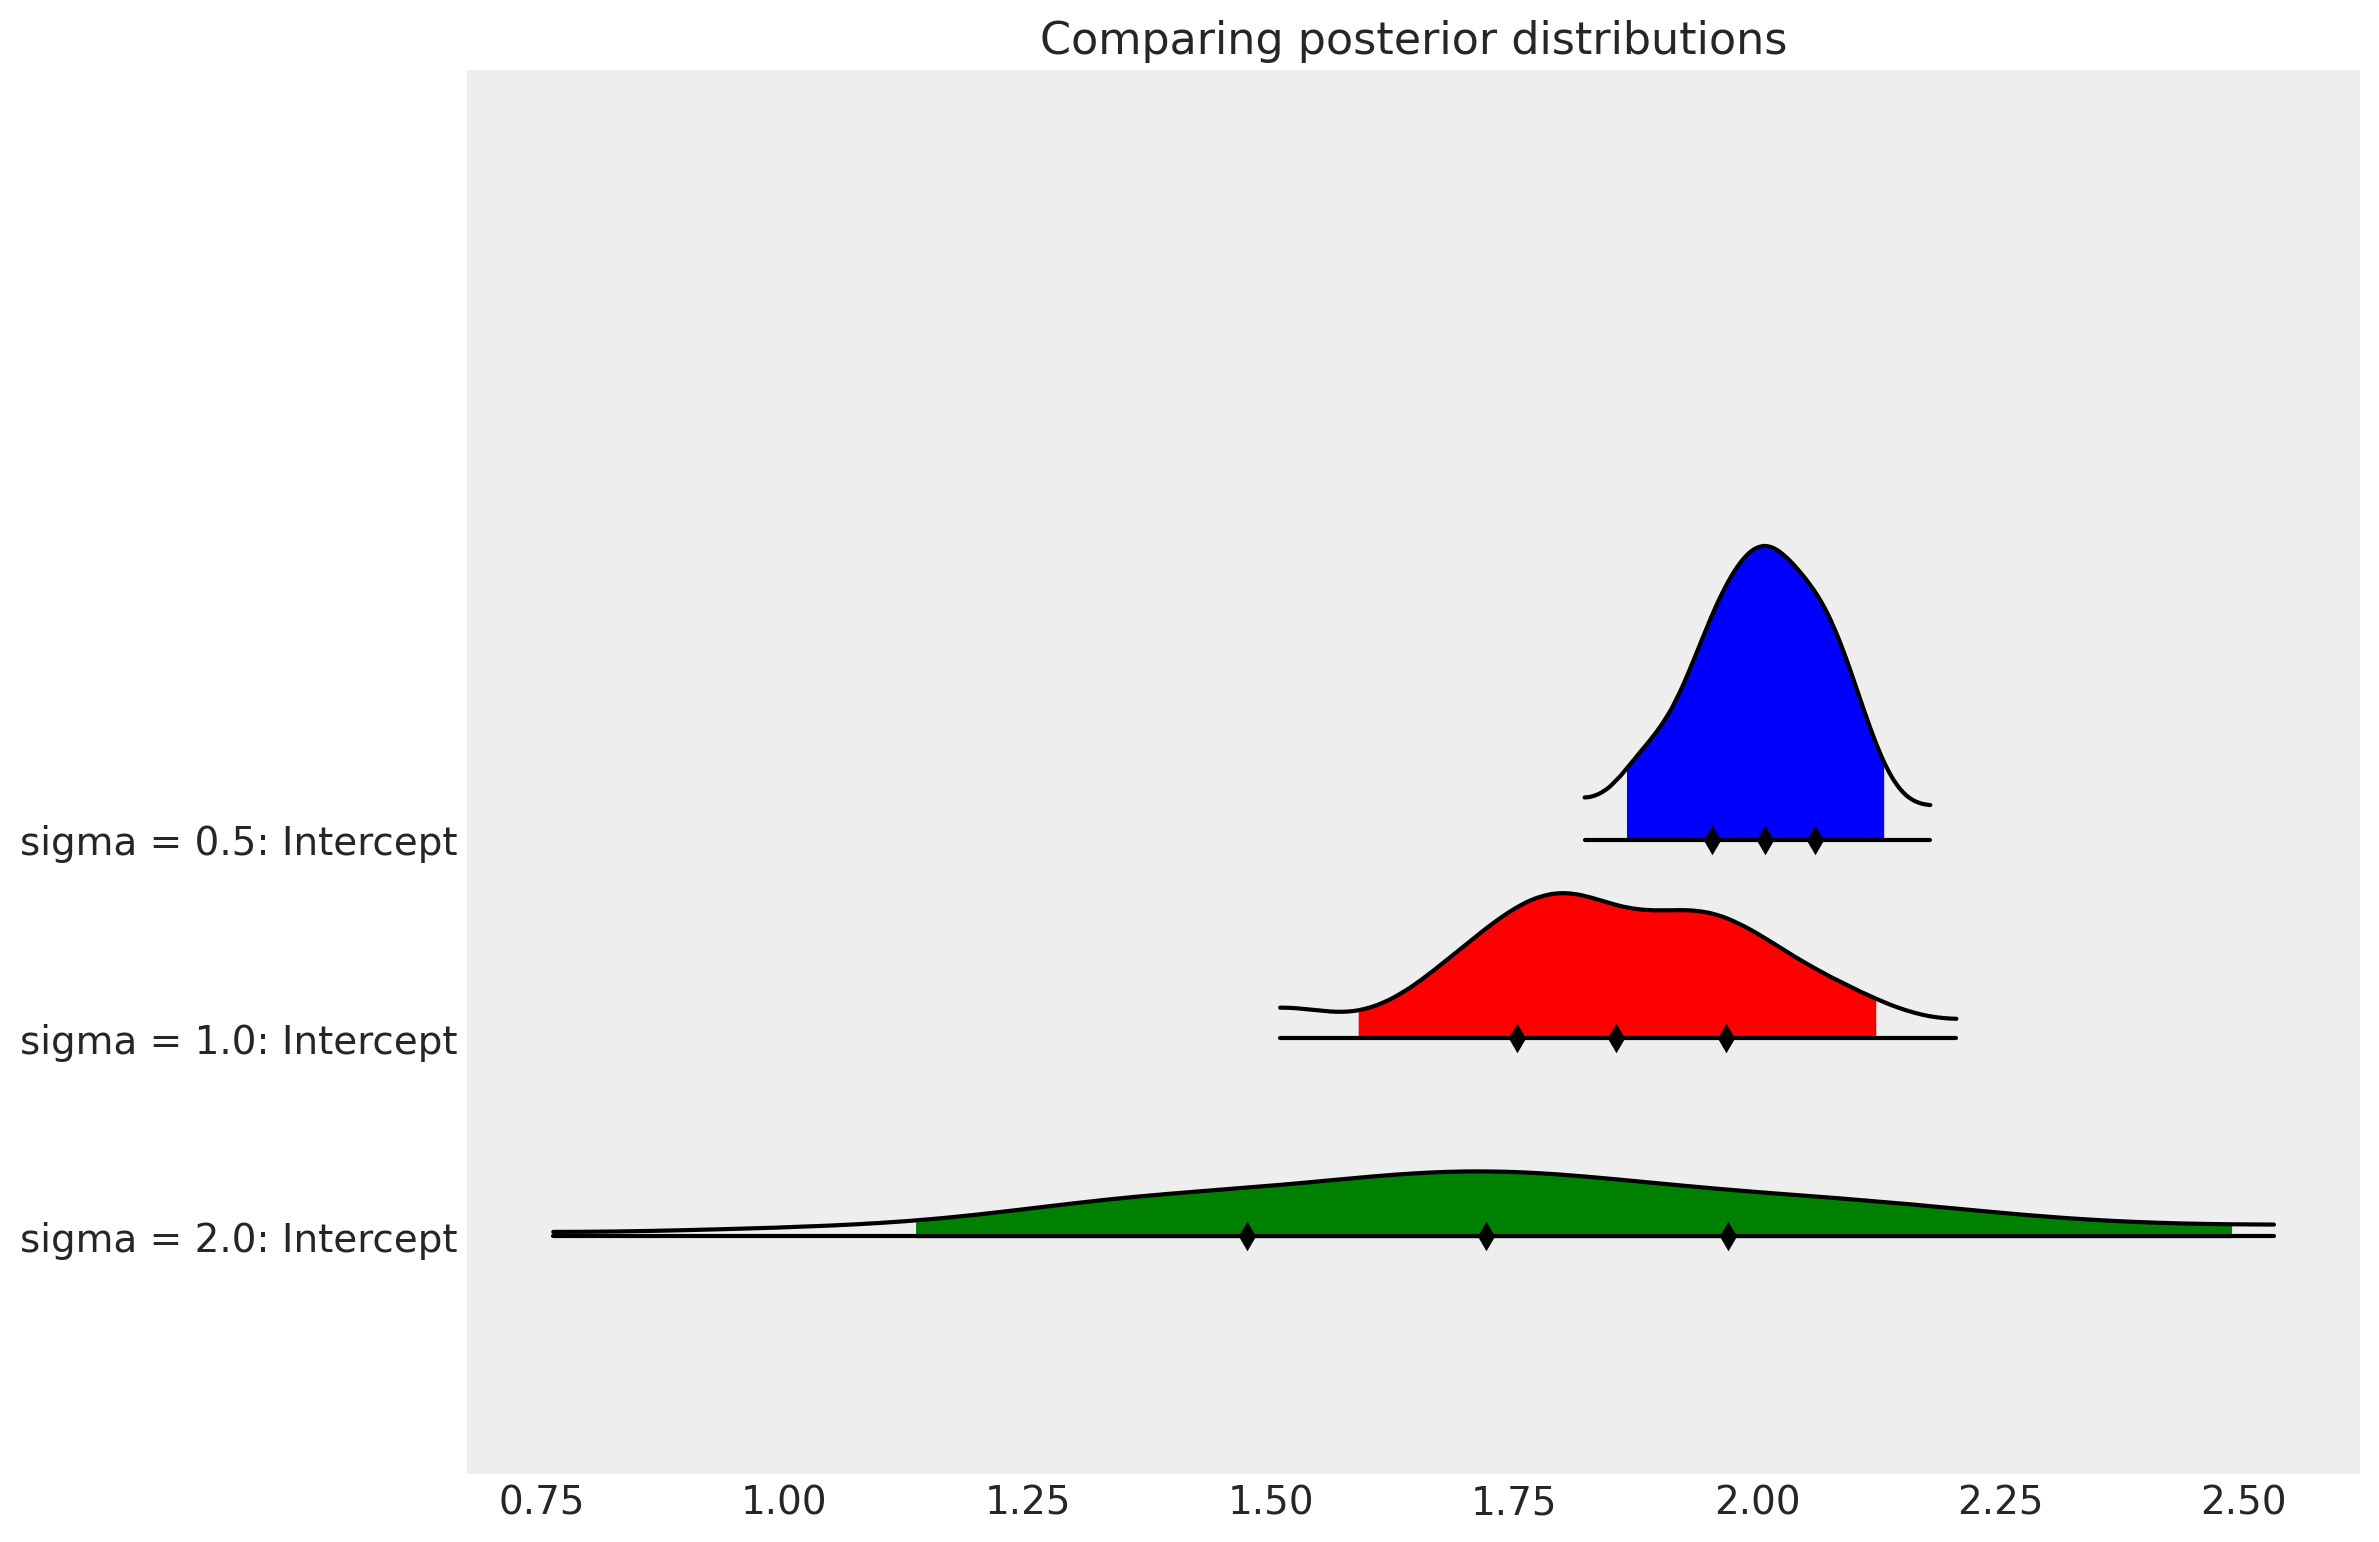

<Figure size 700x700 with 0 Axes>

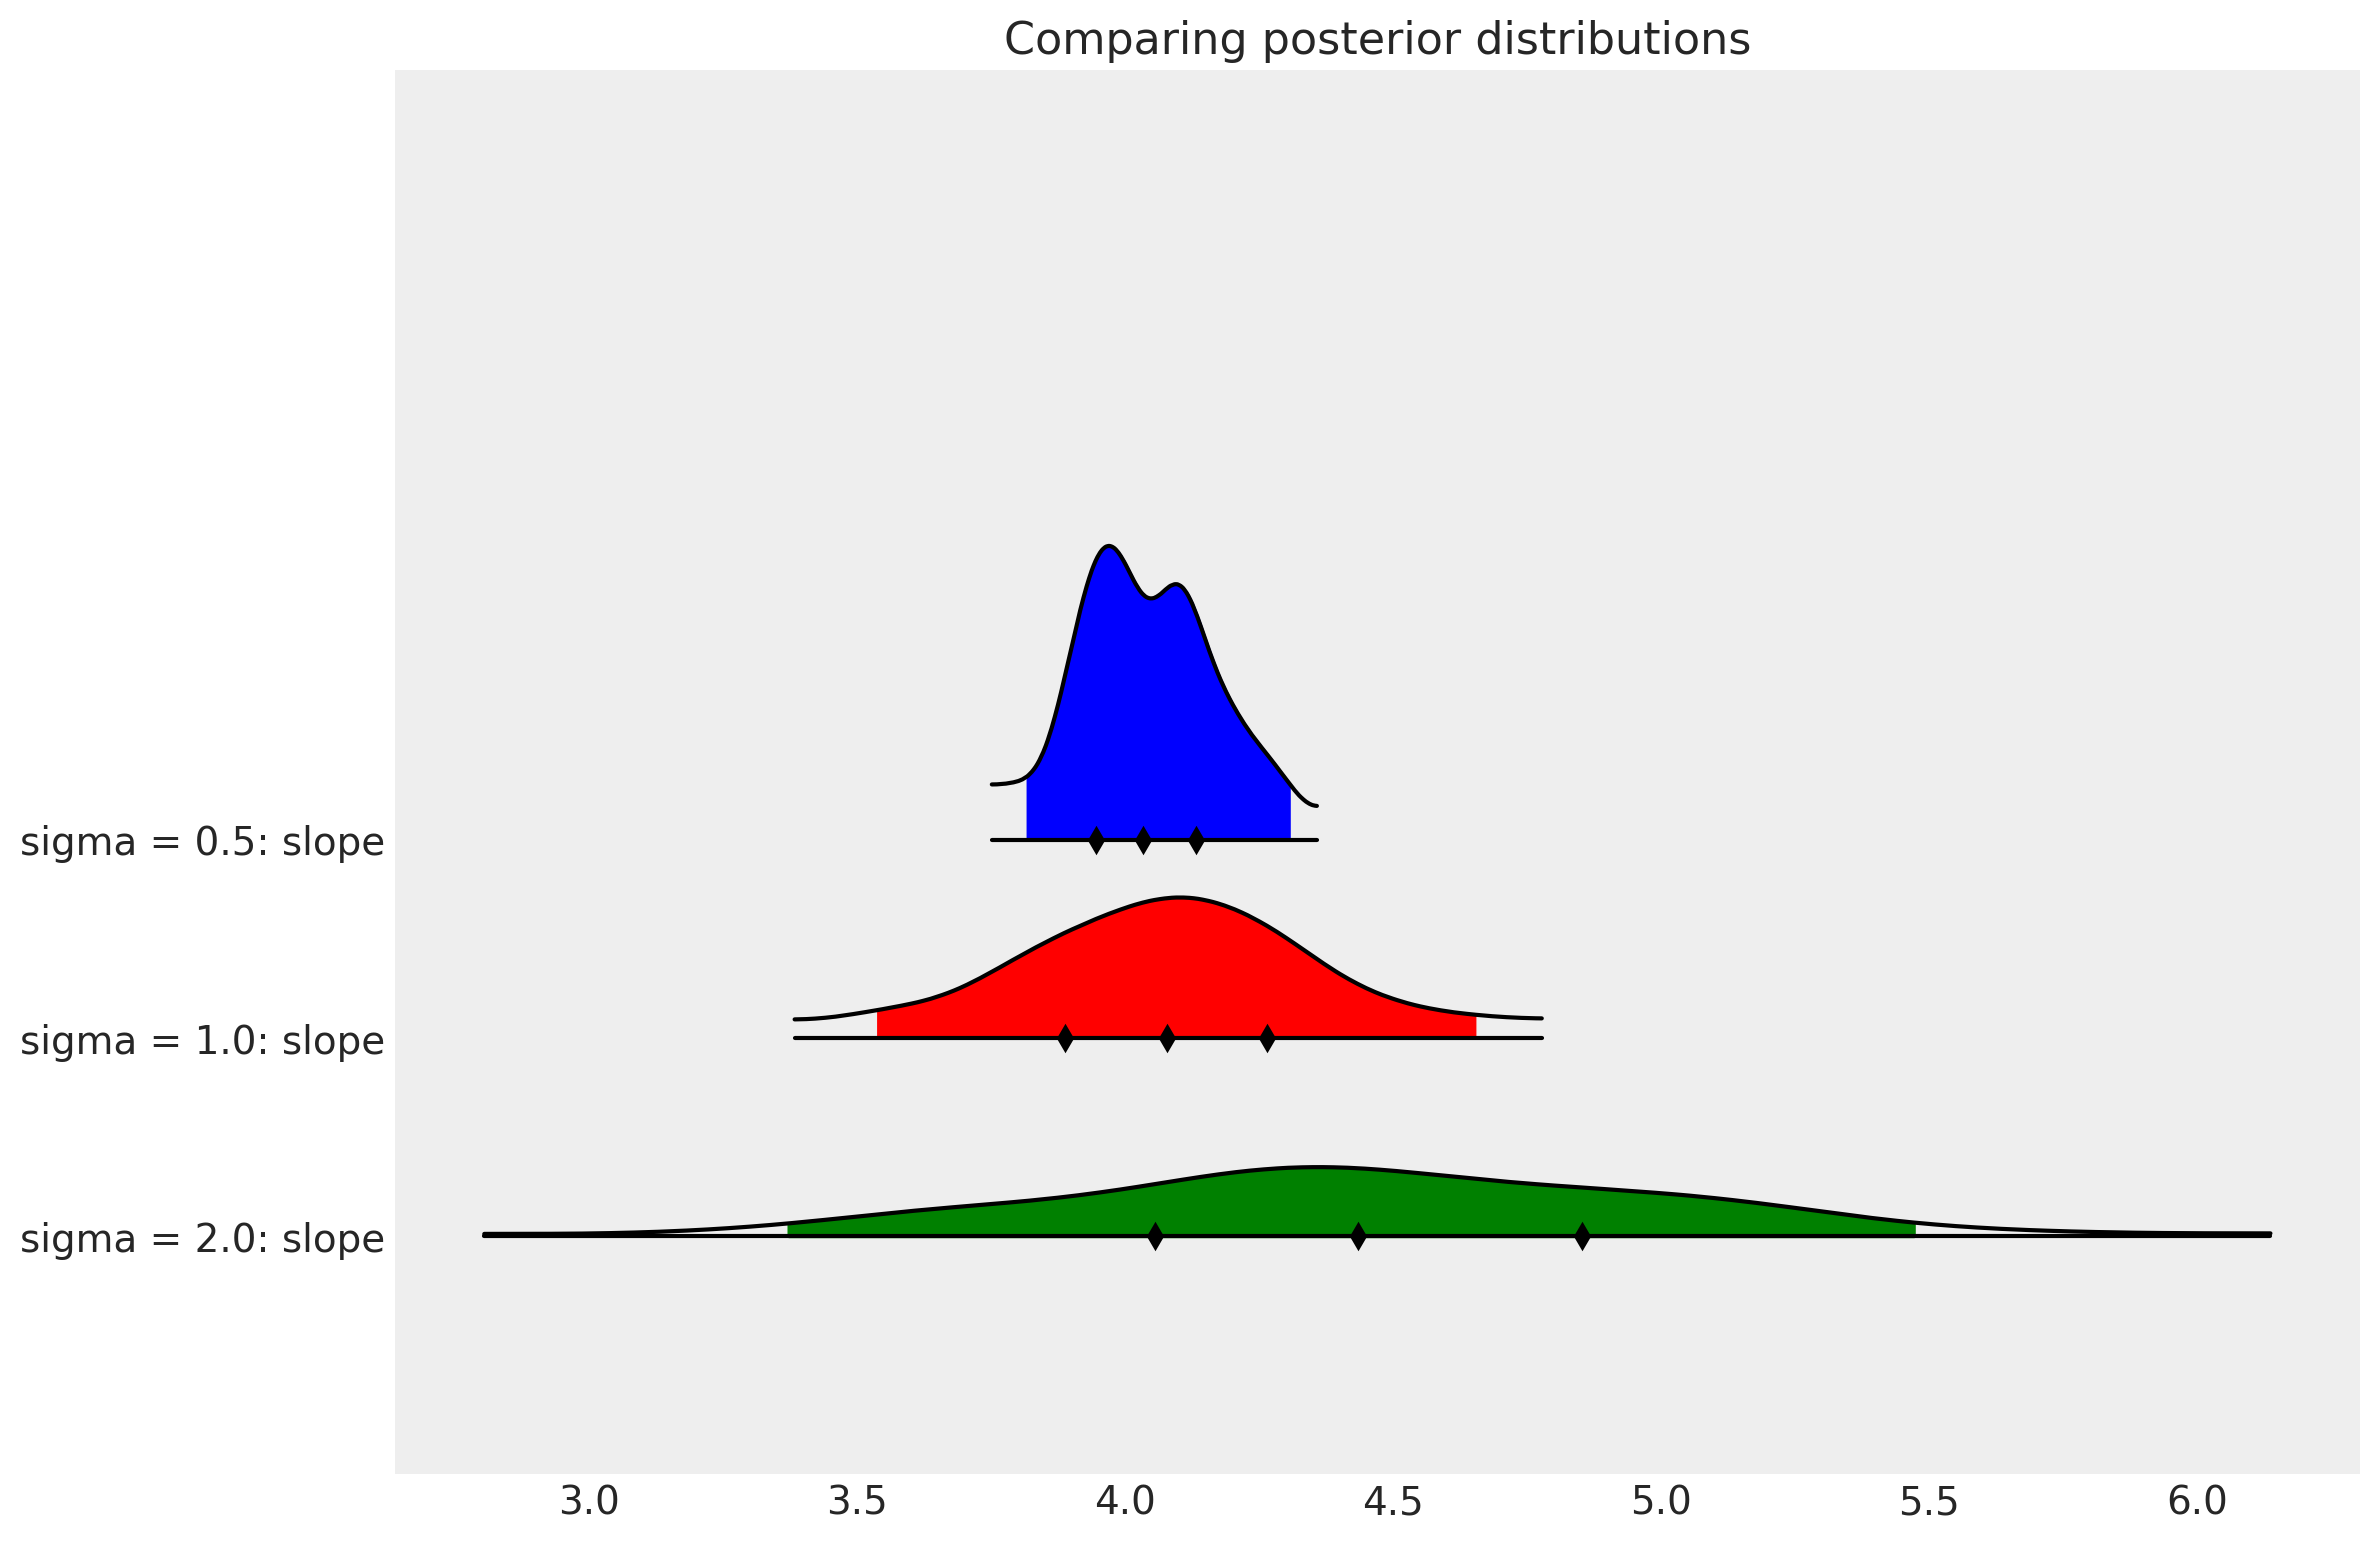

In [15]:
### more examples - comparing posteriors for different sigma values

sigmas = [0.5, 1, 2]
m_names = ['sigma = 0.5', 'sigma = 1.0', 'sigma = 2.0']
traces = []

for i in range(len(sigmas)):
    x,y,y_true = generate_data(sigma=sigmas[i])
    trace = sampler(x,y, chains = 1)
    traces.append(trace)
   
graph_comparisons(traces,m_names)    

## Altering the amount of data

How do the posterior distributions change for different dataset sizes?

Below we use the same initial linear model above to estimate the posteriors for each parameter - except with different dataset sizes (10, 100, 200). The posteriors are then plotted for comparision. As expected, posterior distributions 'flatten' and become less informative as the amount of data decreases. 

Only 200 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [slope, Intercept, sigma]
Sampling chain 0, 0 divergences: 100%|██████████| 2200/2200 [00:02<00:00, 855.81it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 200 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [slope, Intercept, sigma]
Sampling chain 0, 0 divergences: 100%|██████████| 2200/2200 [00:02<00:00, 1040.63it/s]
The acceptance probability does not match the target. It is 0.8816940537138698, but should be close to 0.8. Try to increase the number of tuning steps.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 200 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [slope, 

<Figure size 700x700 with 0 Axes>

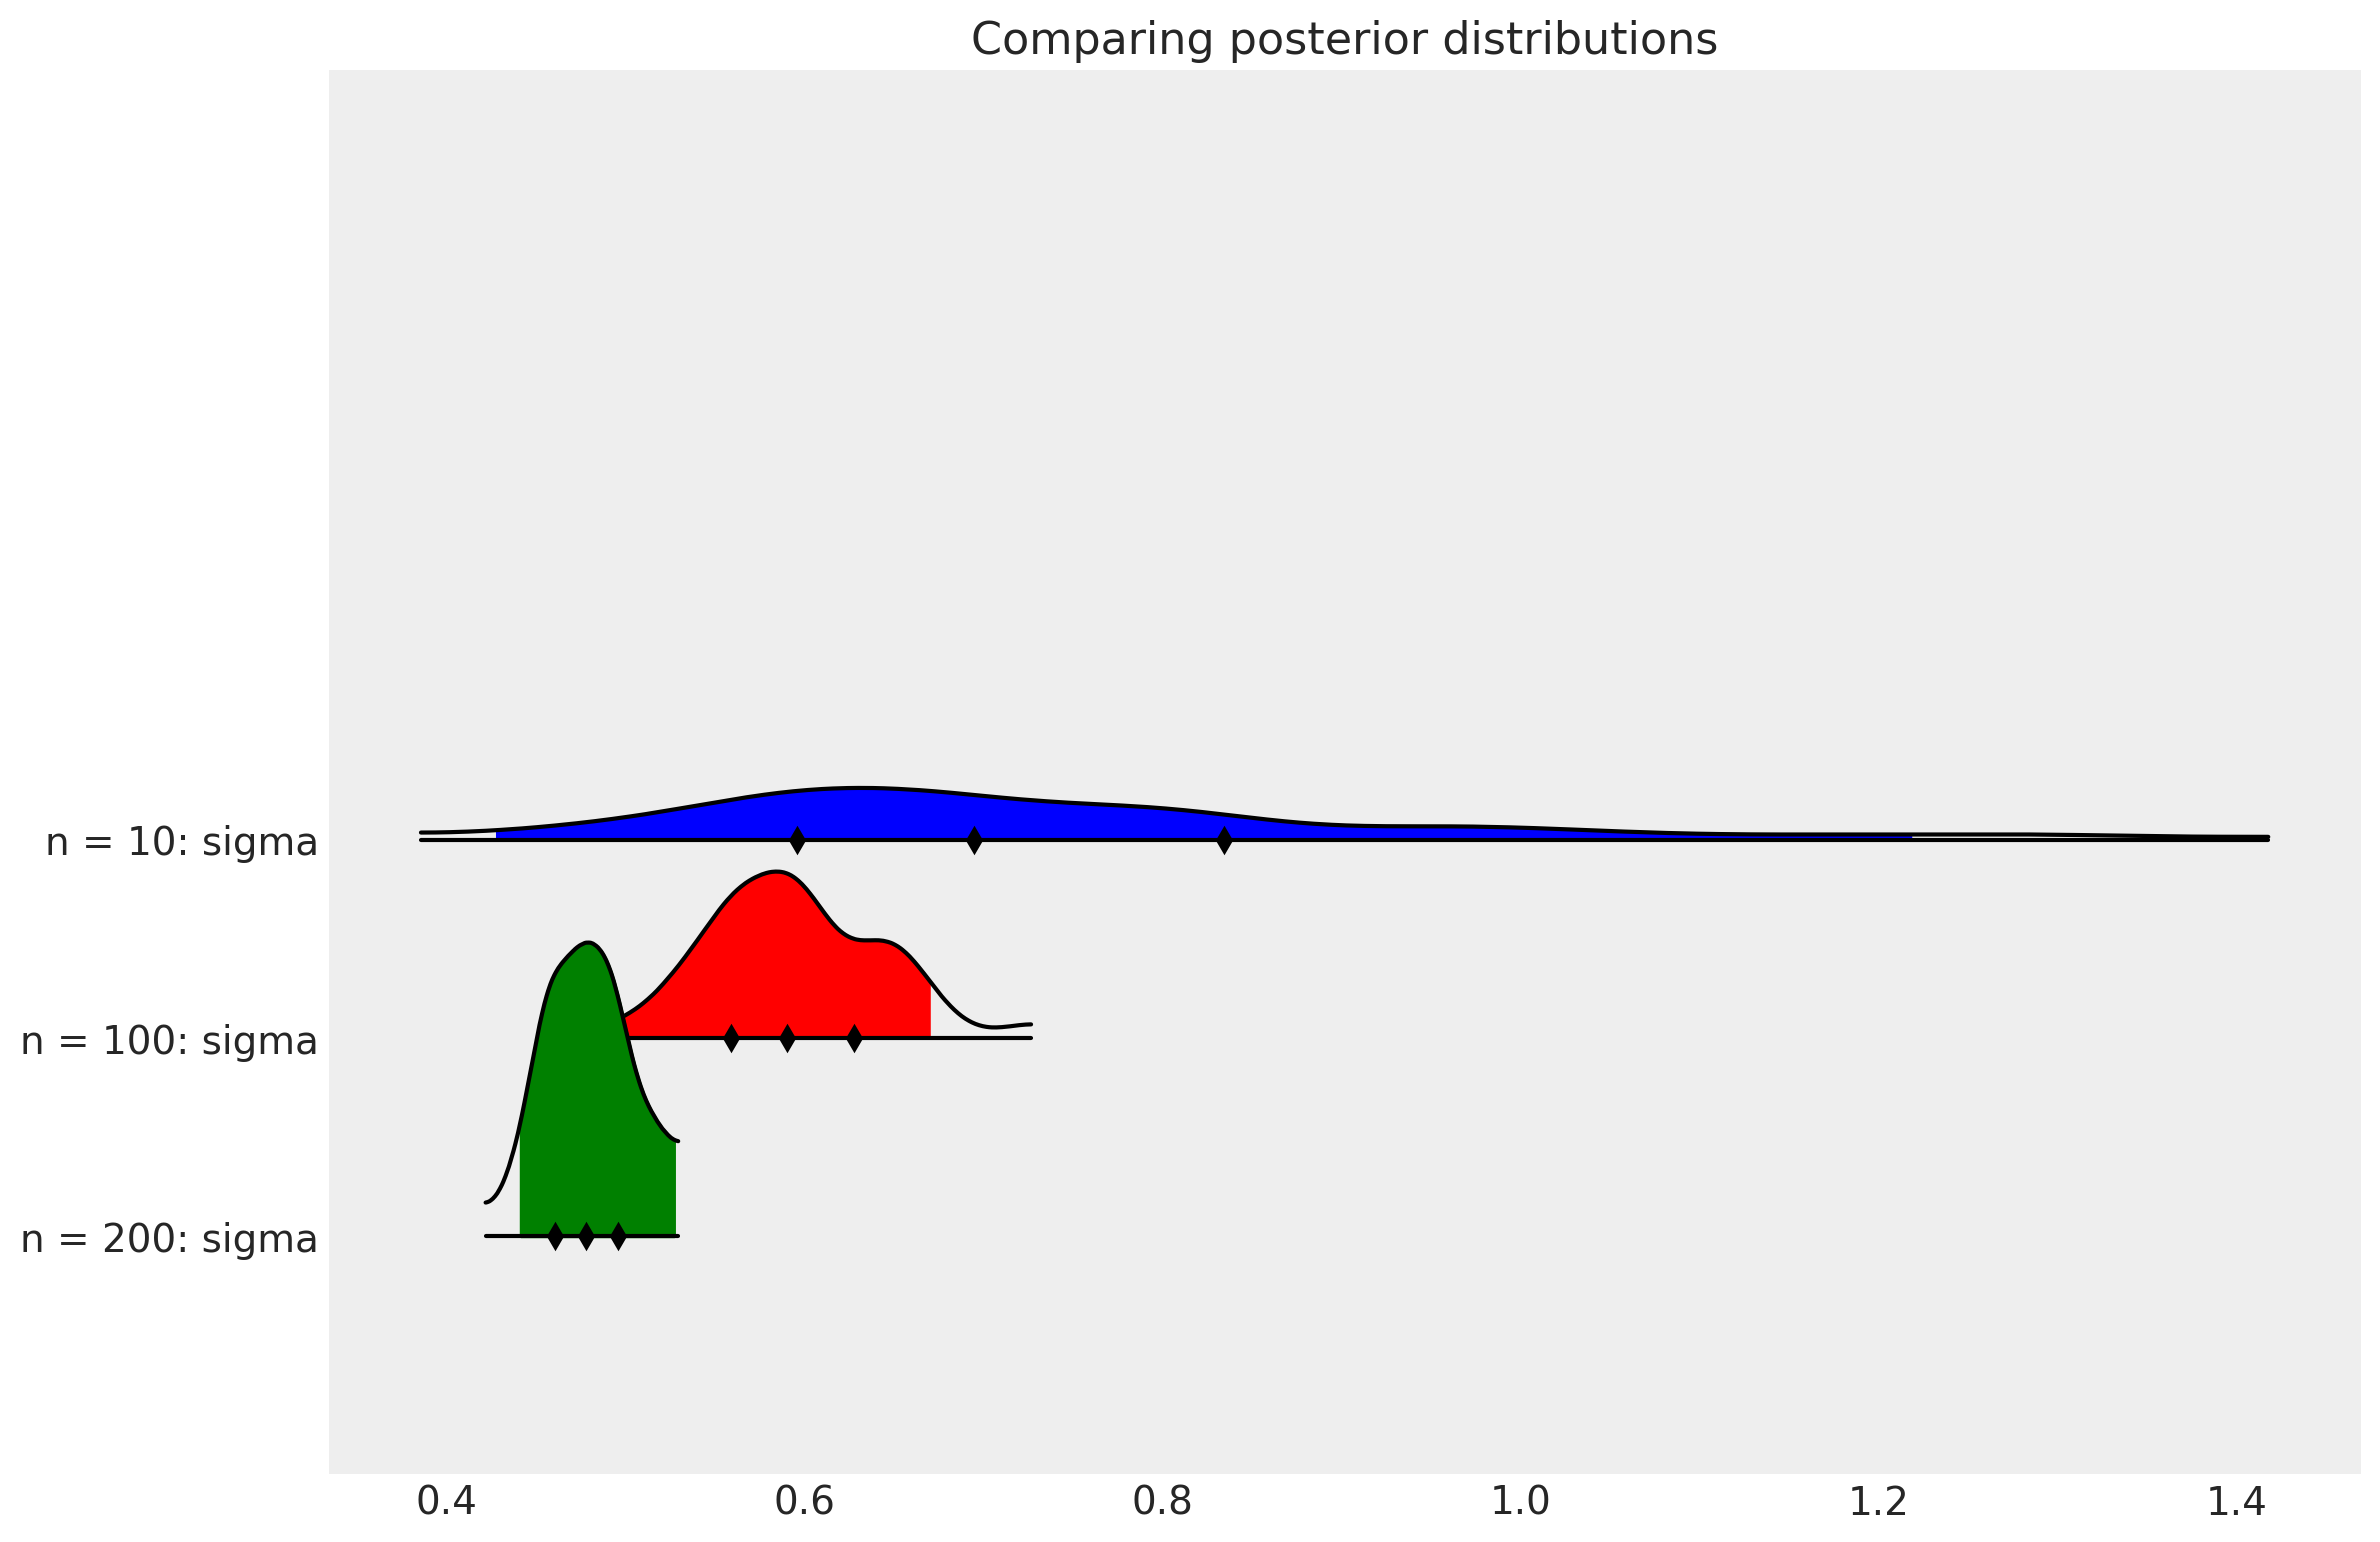

<Figure size 700x700 with 0 Axes>

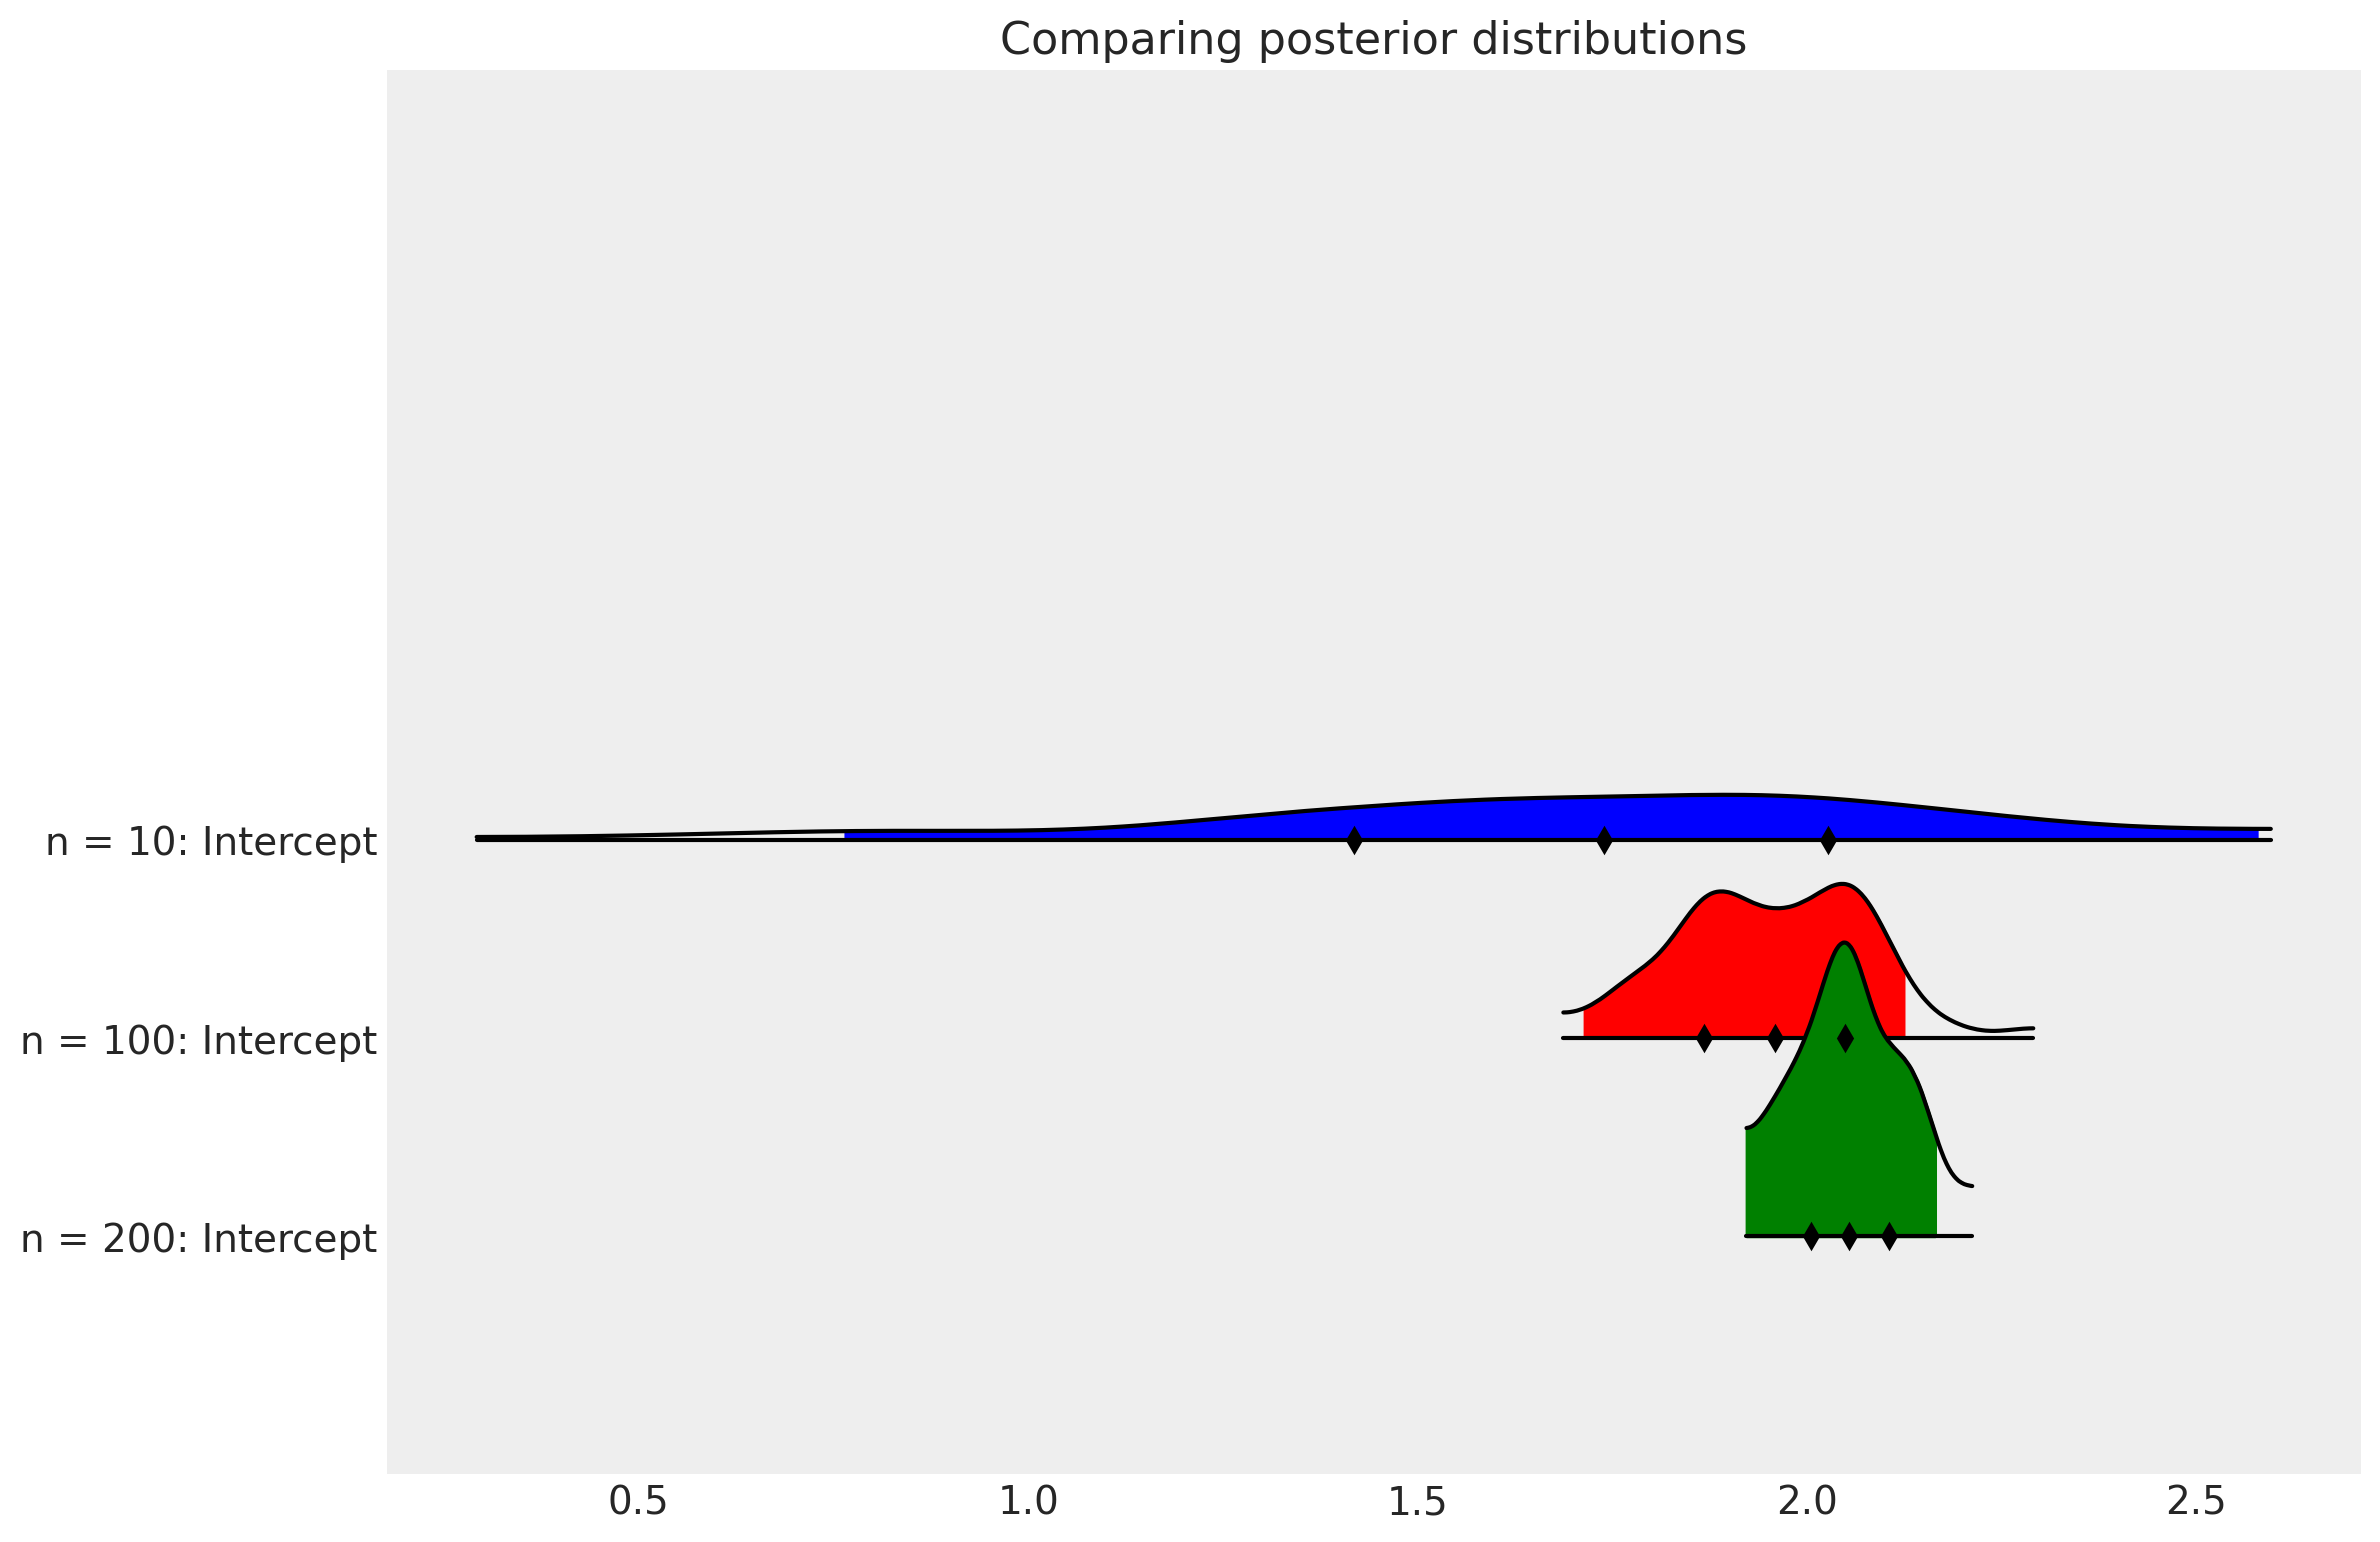

<Figure size 700x700 with 0 Axes>

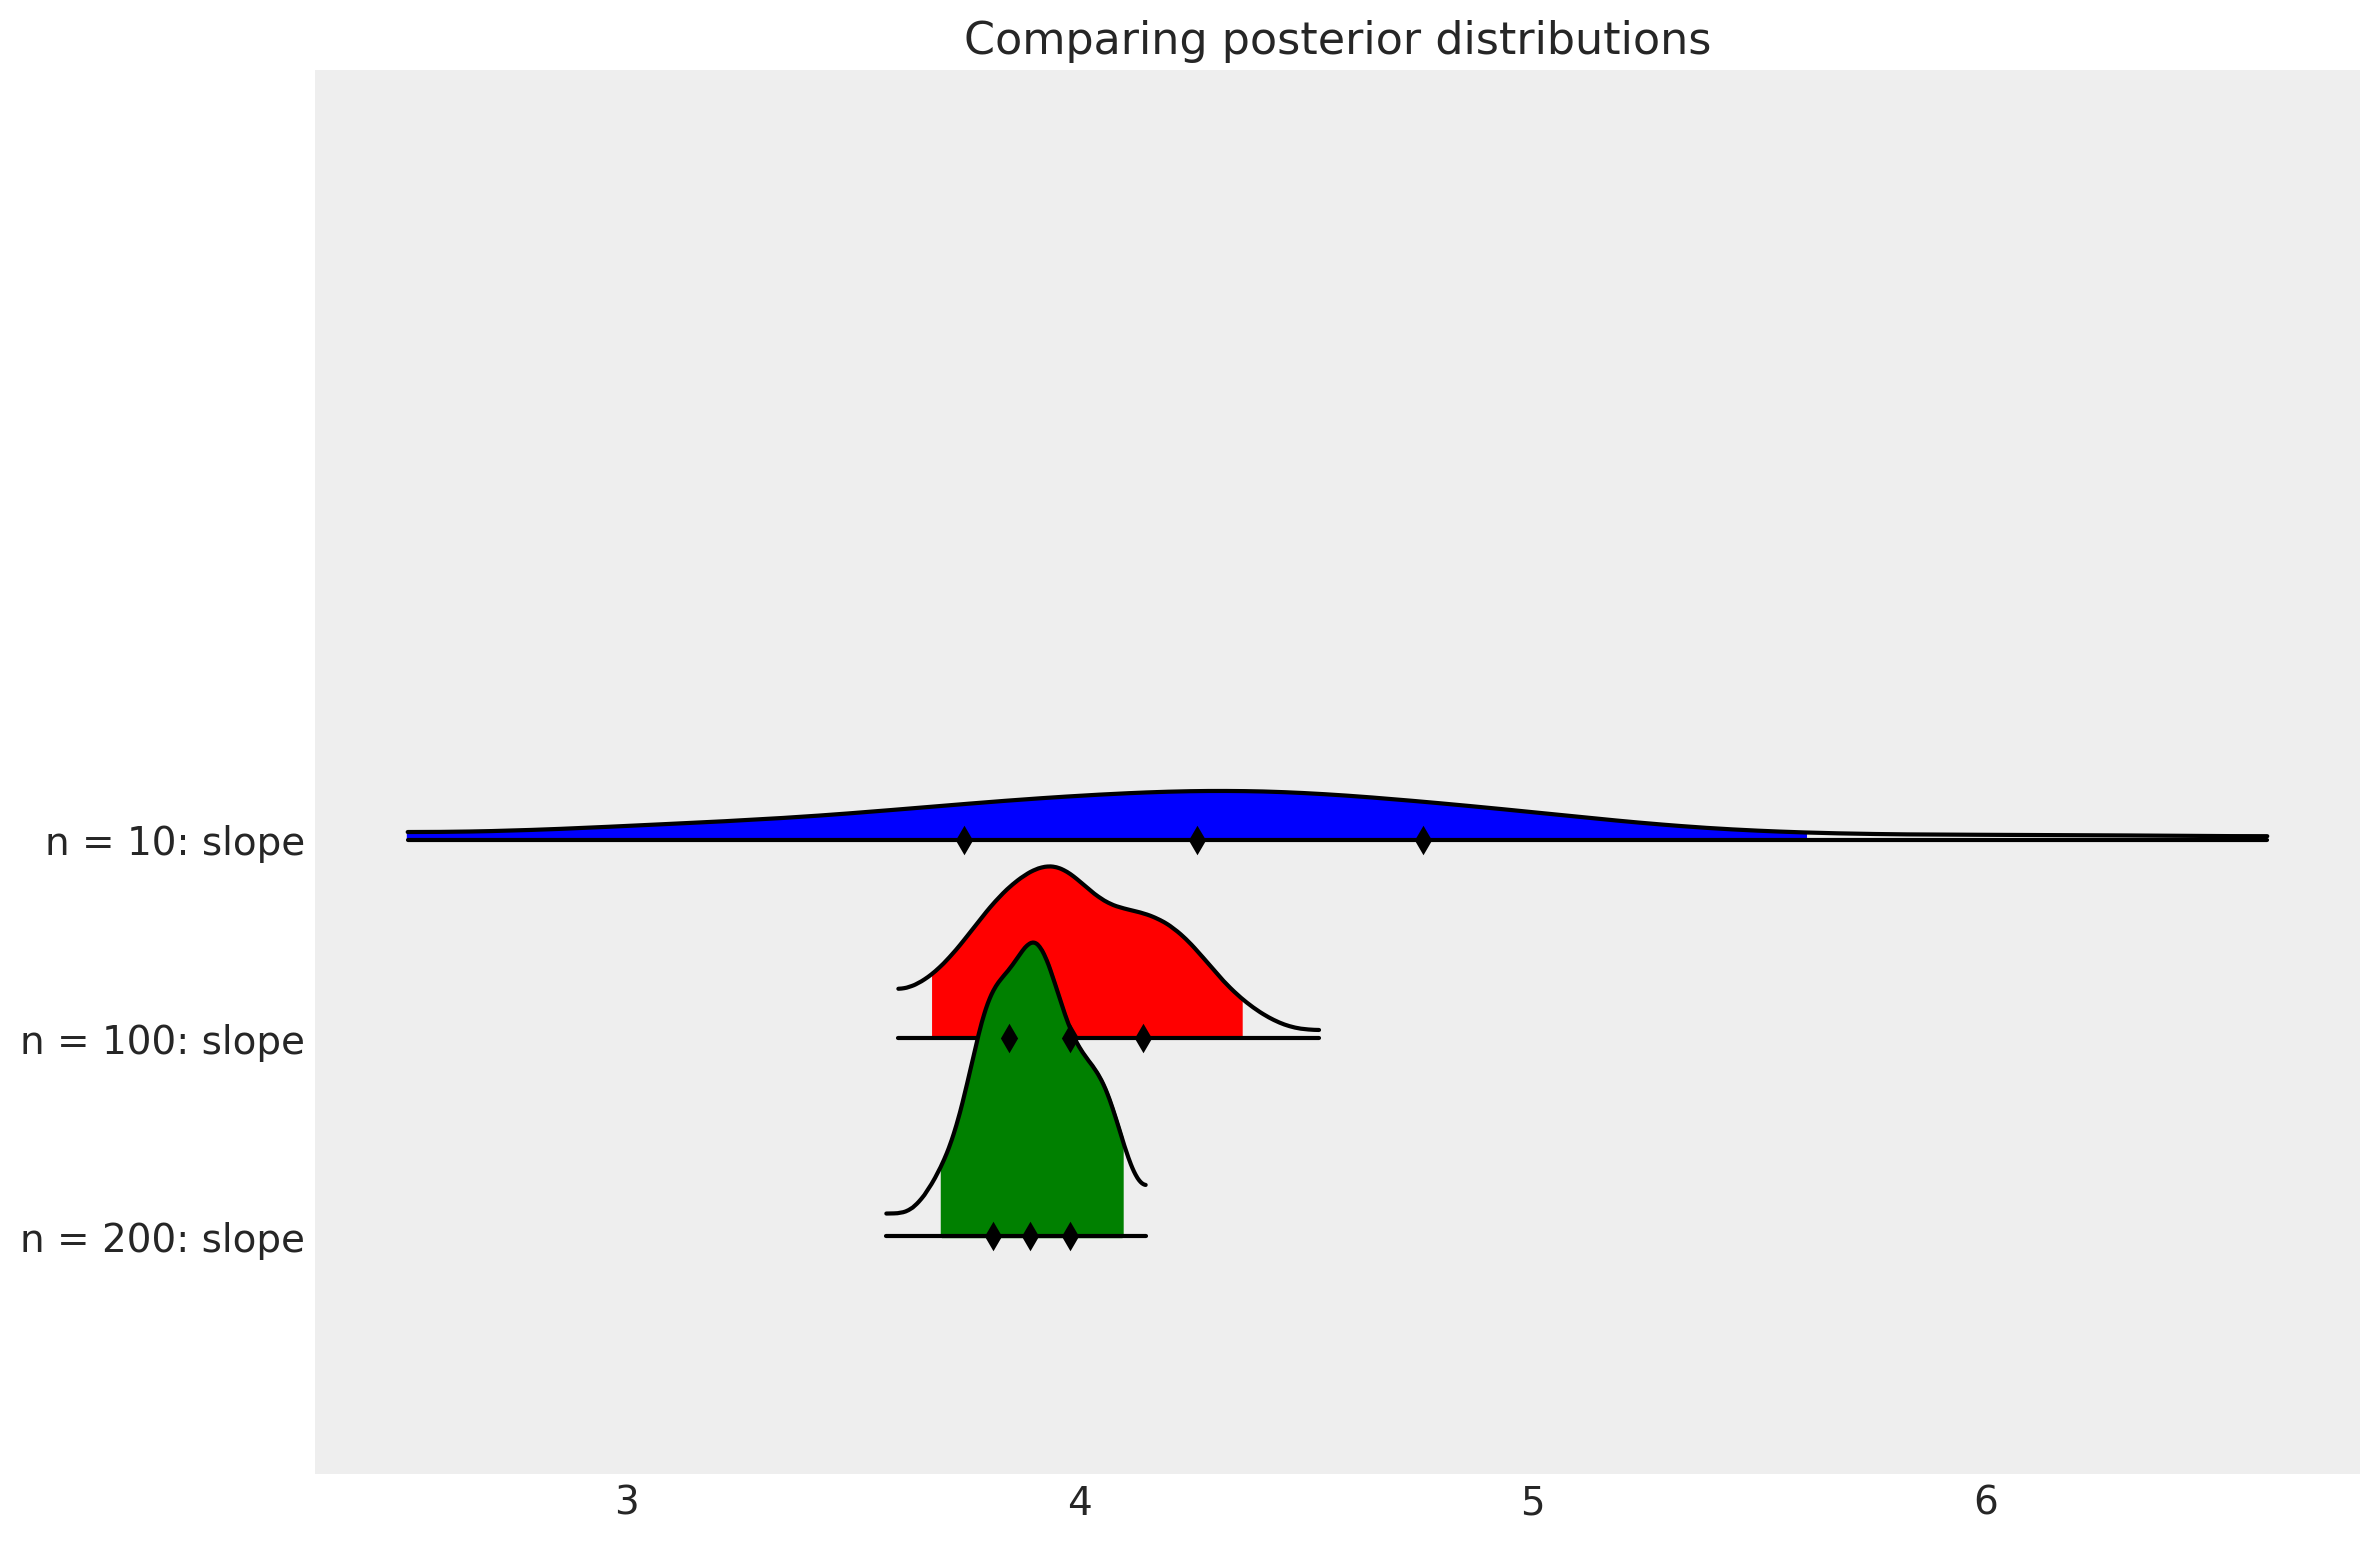

In [16]:
### more examples - comparing posteriors for different data sizes

data_size = [10, 100, 200]
m_names = ['n = 10', 'n = 100', 'n = 200']
traces = []

for i in range(len(data_size)):
    x,y,y_true = generate_data(data_size=data_size[i])
    trace = sampler(x,y, chains = 1)
    traces.append(trace)
   
graph_comparisons(traces,m_names)   



## Altering the prior distributions

How do the posterior distributions change for different prior distributions - in the low data regime?

Below we use the same initial linear model above to estimate the posteriors for each parameter - except with a small dataset (n=10) and with different prior distribution sets, the 'Normal' priors described above, and 'Uniform' priors:

$p(a) = p(b) = \mathrm{Uniform}(-5,5)$

$p(\sigma) = \mathrm{Uniform}(0,1)$

The posteriors are then plotted for comparision. As expected, in the low data regime the choice of prior significantly alters the posterior distribution. So, when using a small amount of data, the priors should be chosen carefully. 

Only 200 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [slope, Intercept, sigma]
Sampling chain 0, 0 divergences: 100%|██████████| 2200/2200 [00:02<00:00, 992.06it/s] 
The acceptance probability does not match the target. It is 0.6299551638575075, but should be close to 0.8. Try to increase the number of tuning steps.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 200 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [slope, Intercept, sigma]
Sampling chain 0, 0 divergences: 100%|██████████| 2200/2200 [00:02<00:00, 892.53it/s] 
Only one chain was sampled, this makes it impossible to run some convergence checks


<Figure size 700x700 with 0 Axes>

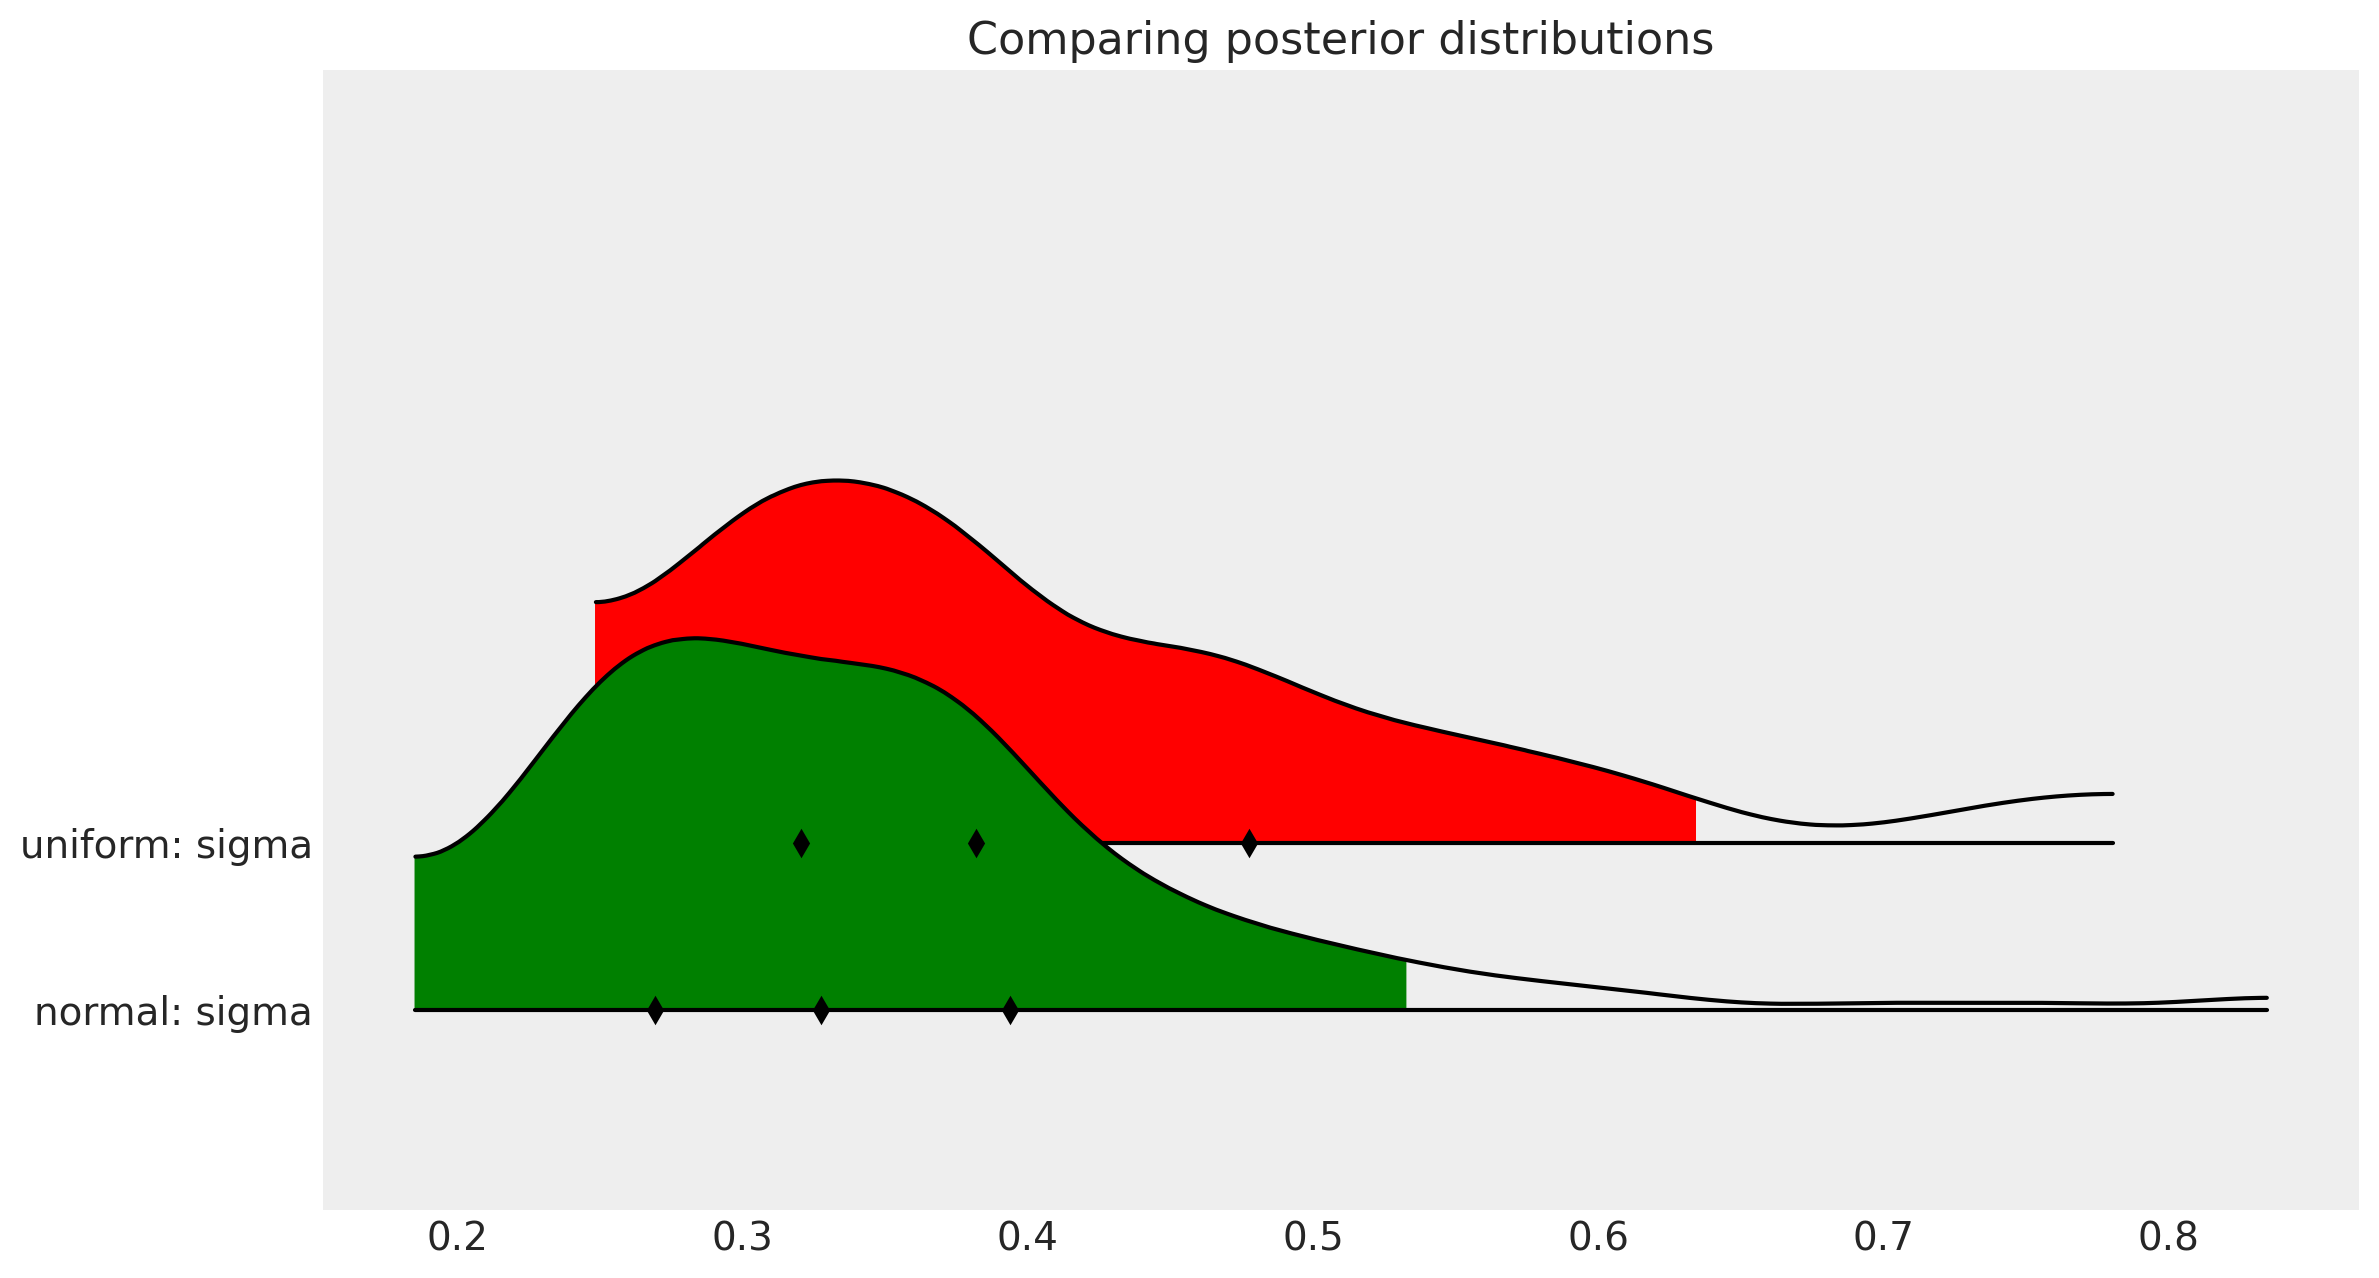

<Figure size 700x700 with 0 Axes>

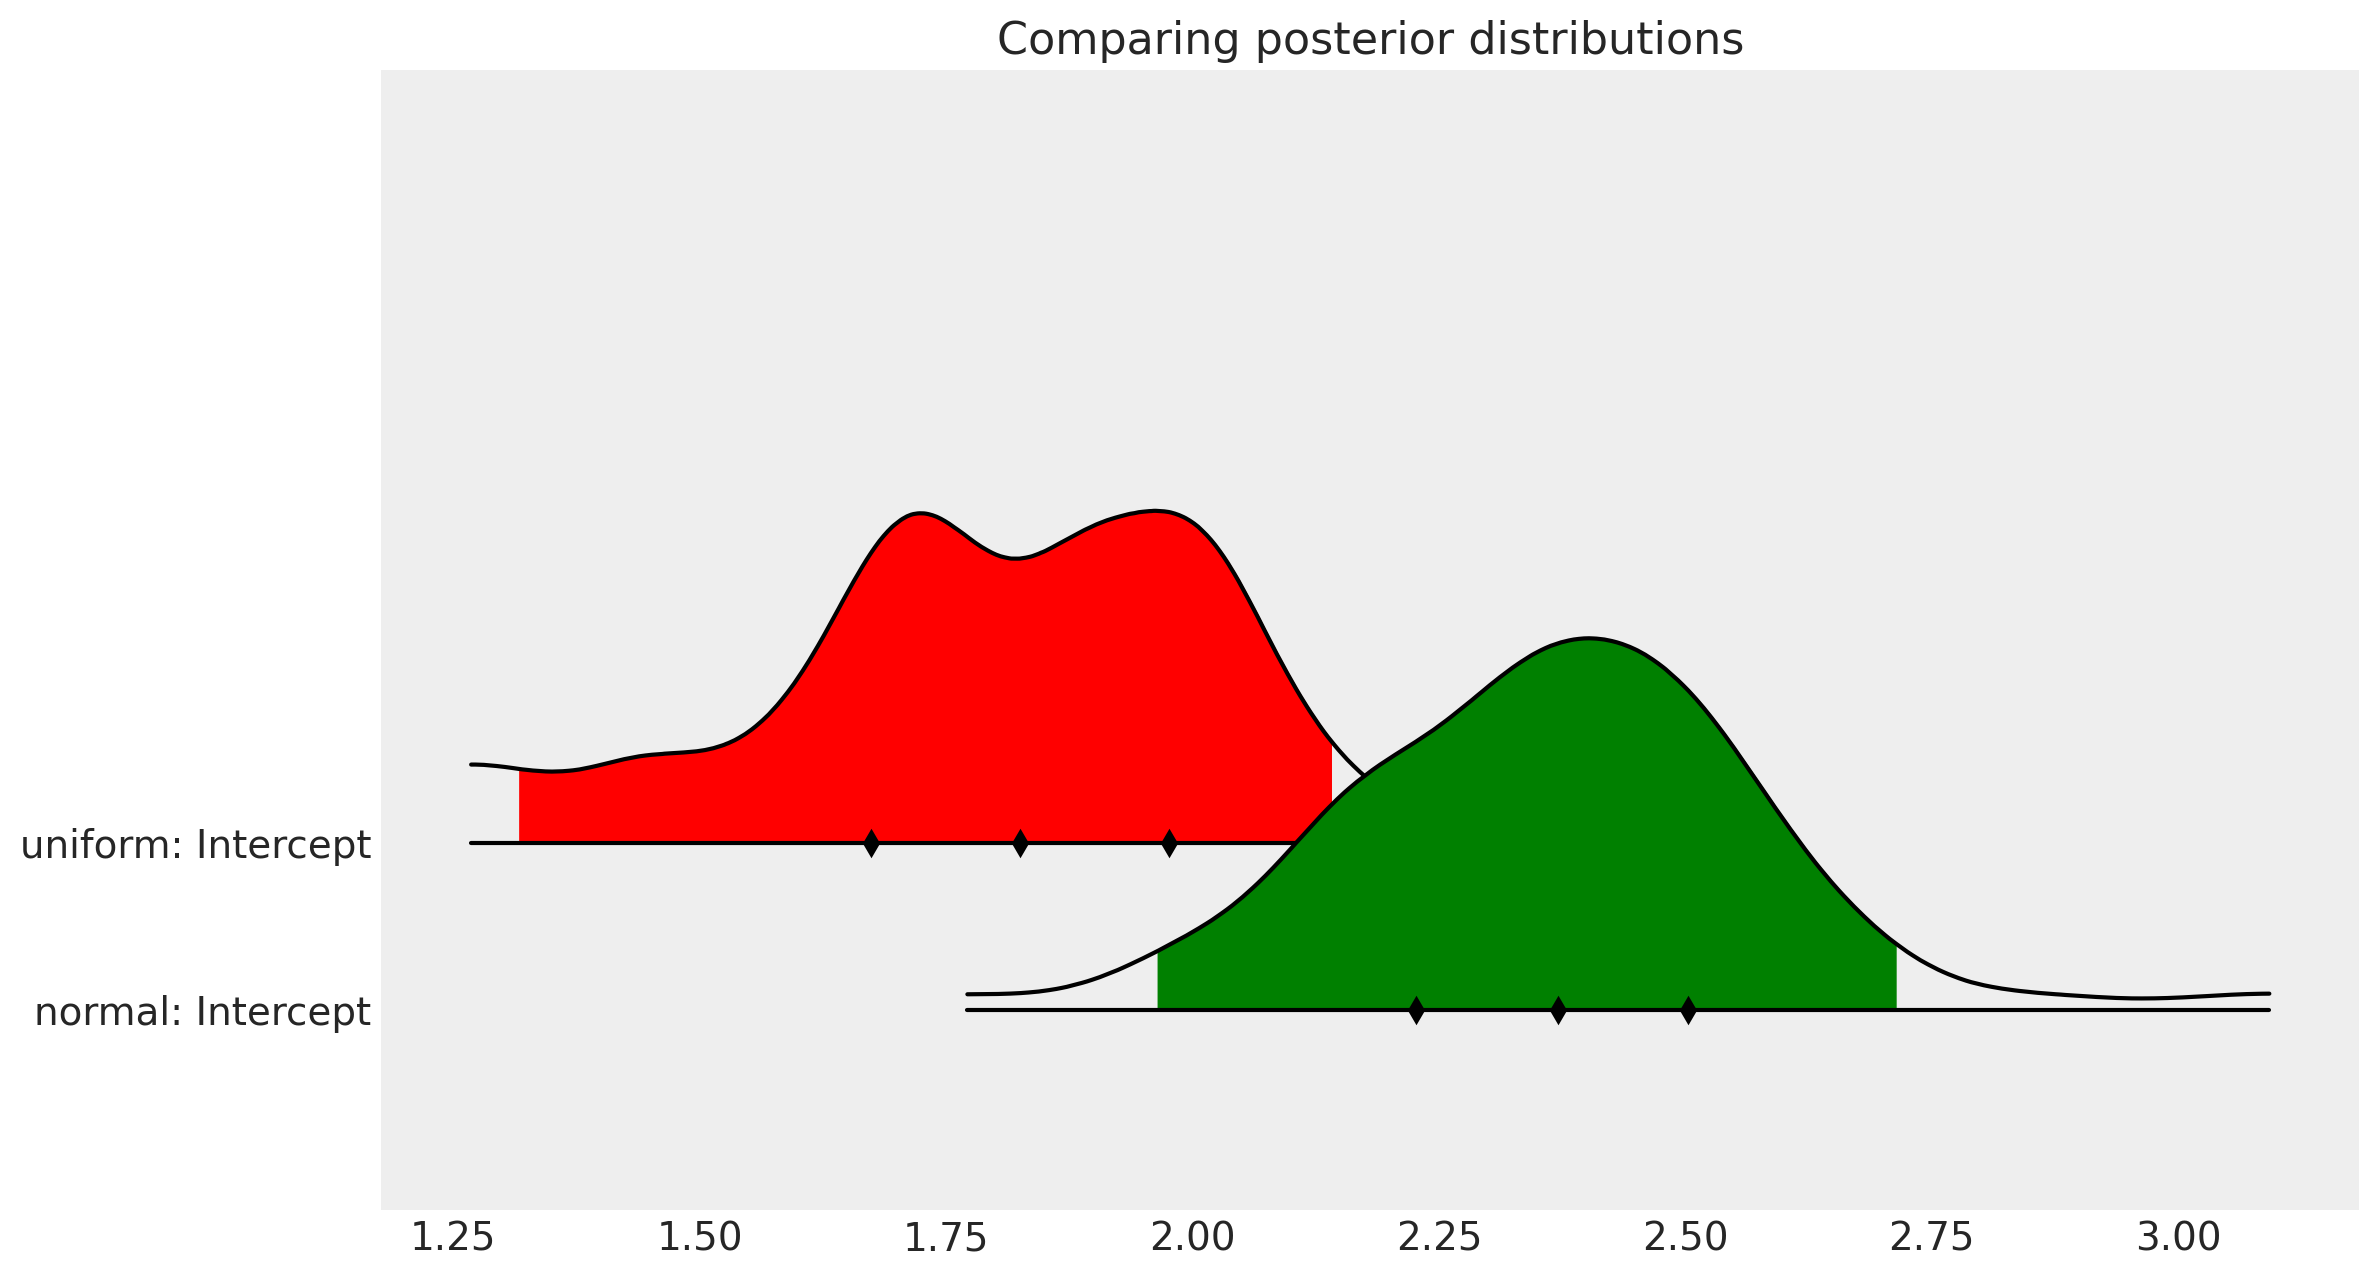

<Figure size 700x700 with 0 Axes>

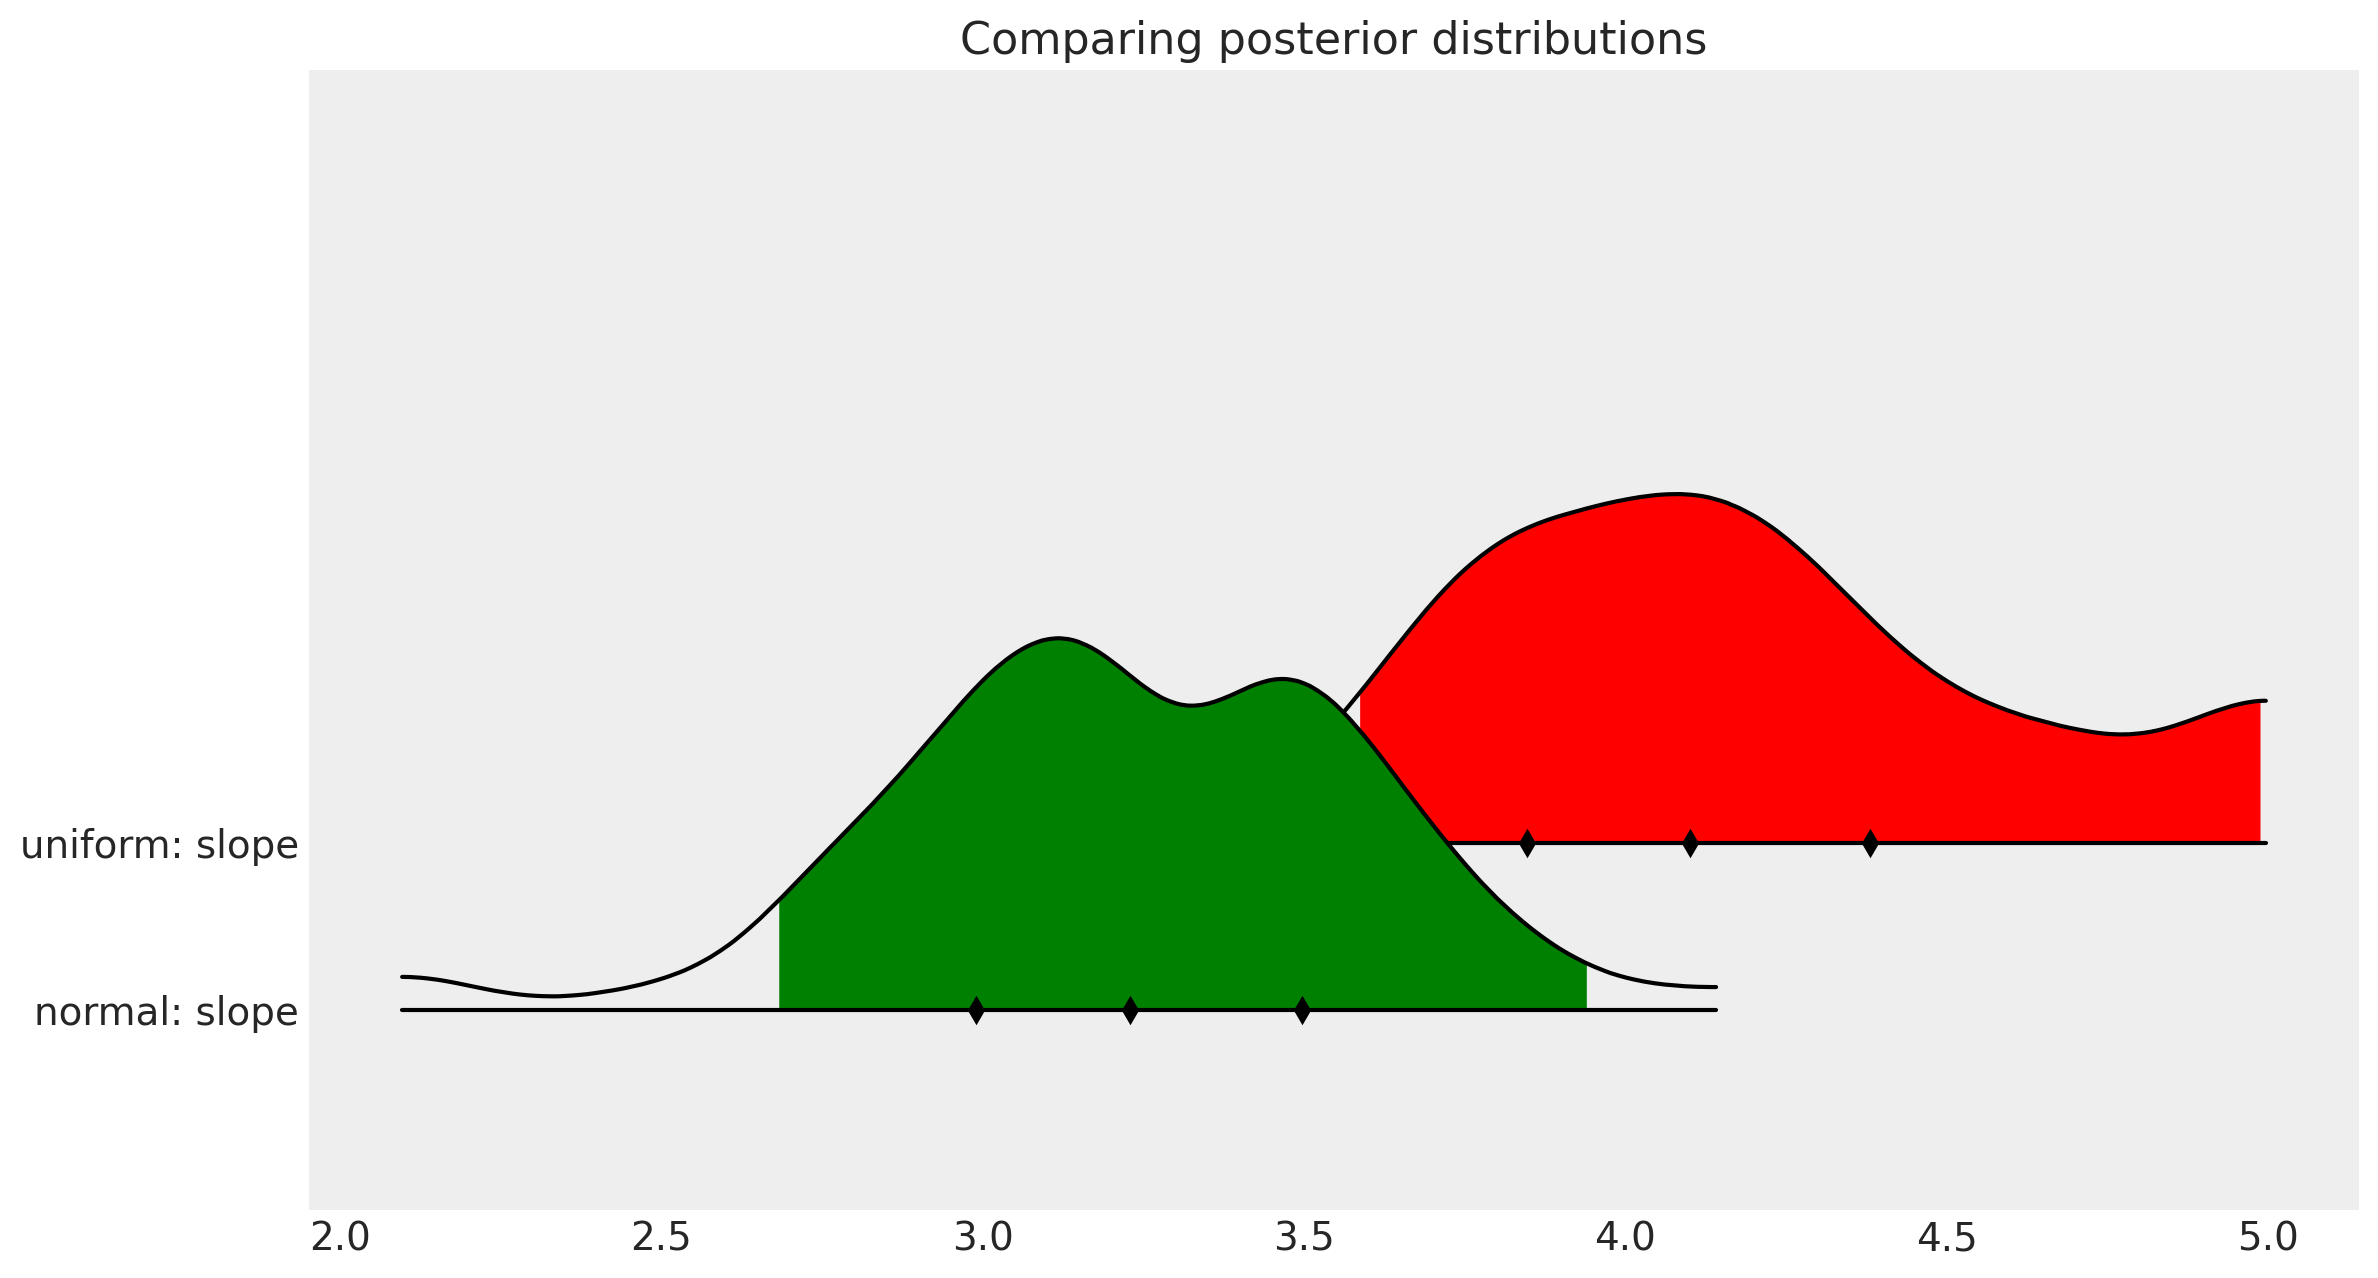

In [17]:
### more examples - comparing posteriors for different prior distributions, low data regime

m_names = ['uniform', 'normal']
traces = []

for i in range(len(m_names)):
    x,y,y_true = generate_data(data_size=10)
    trace = sampler(x,y, chains = 1, prior = m_names[i])
    traces.append(trace)
   
graph_comparisons(traces,m_names)  



## Altering the prior distributions - large dataset

How do the posterior distributions change for different prior distributions - with a large dataset?

Below we use the same initial linear model above to estimate the posteriors for each parameter - except with a large dataset (n=200) and with different prior distribution sets, the 'Normal' priors described above, and 'Uniform' priors:

$p(a) = p(b) = \mathrm{Uniform}(-5,5)$

$p(\sigma) = \mathrm{Uniform}(0,1)$

The posteriors are then plotted for comparision. As expected, with a large dataset the choice of prior has less of an effect on the posterior distributions - although there still is a small difference in the posteriors.

Only 200 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [slope, Intercept, sigma]
Sampling chain 0, 0 divergences: 100%|██████████| 2200/2200 [00:02<00:00, 1018.22it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 200 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [slope, Intercept, sigma]
Sampling chain 0, 0 divergences: 100%|██████████| 2200/2200 [00:02<00:00, 1017.06it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks


<Figure size 700x700 with 0 Axes>

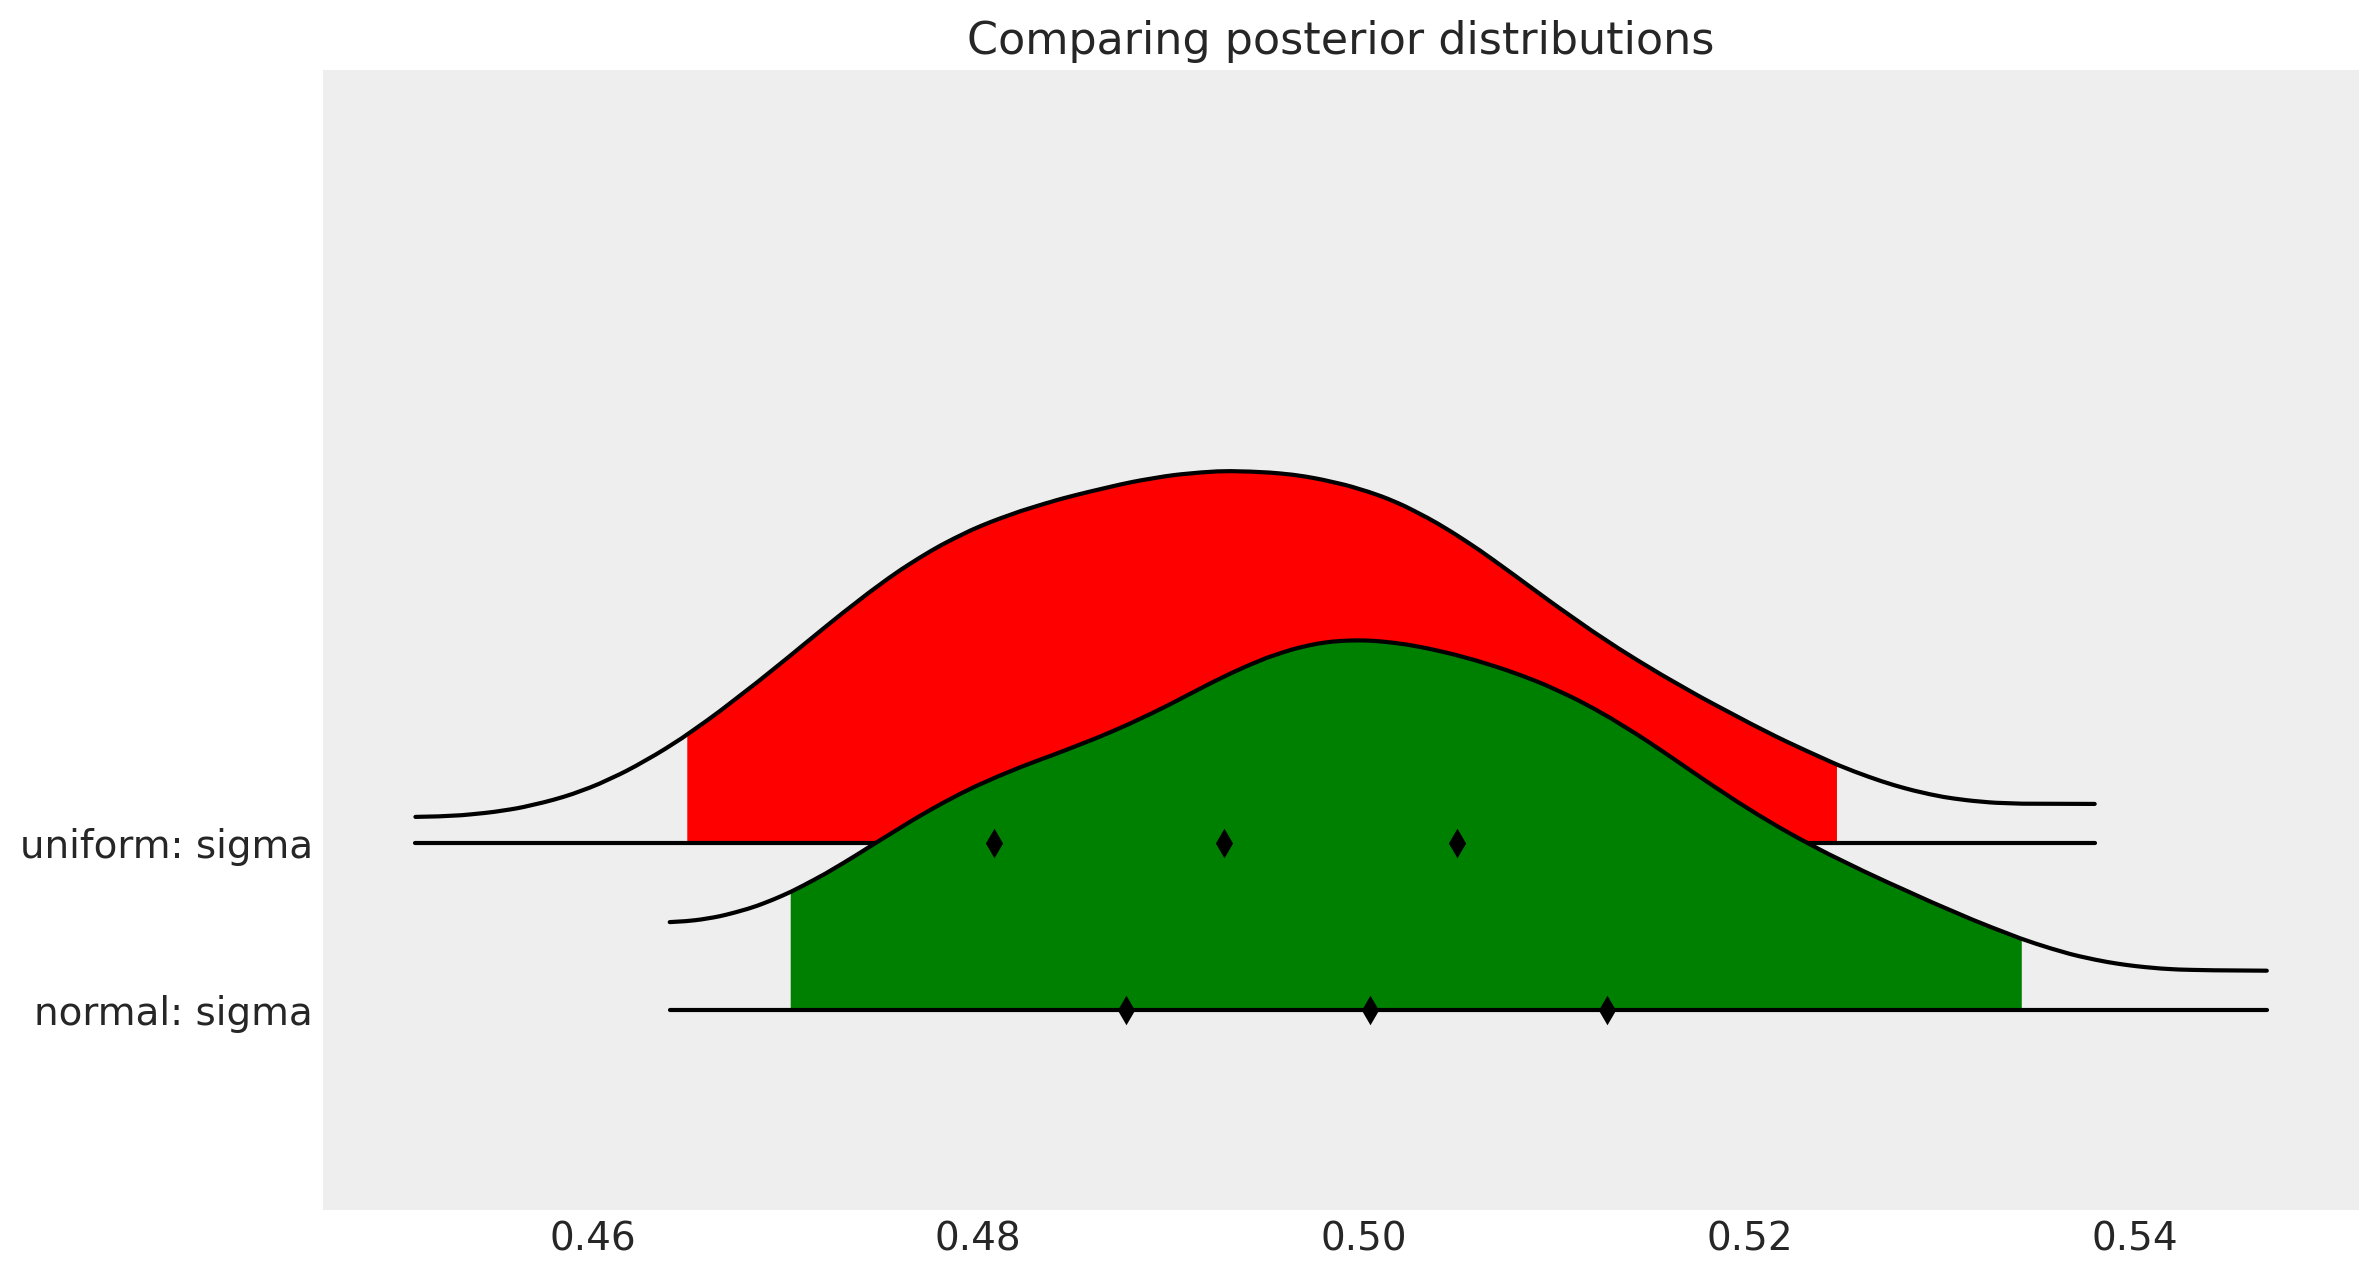

<Figure size 700x700 with 0 Axes>

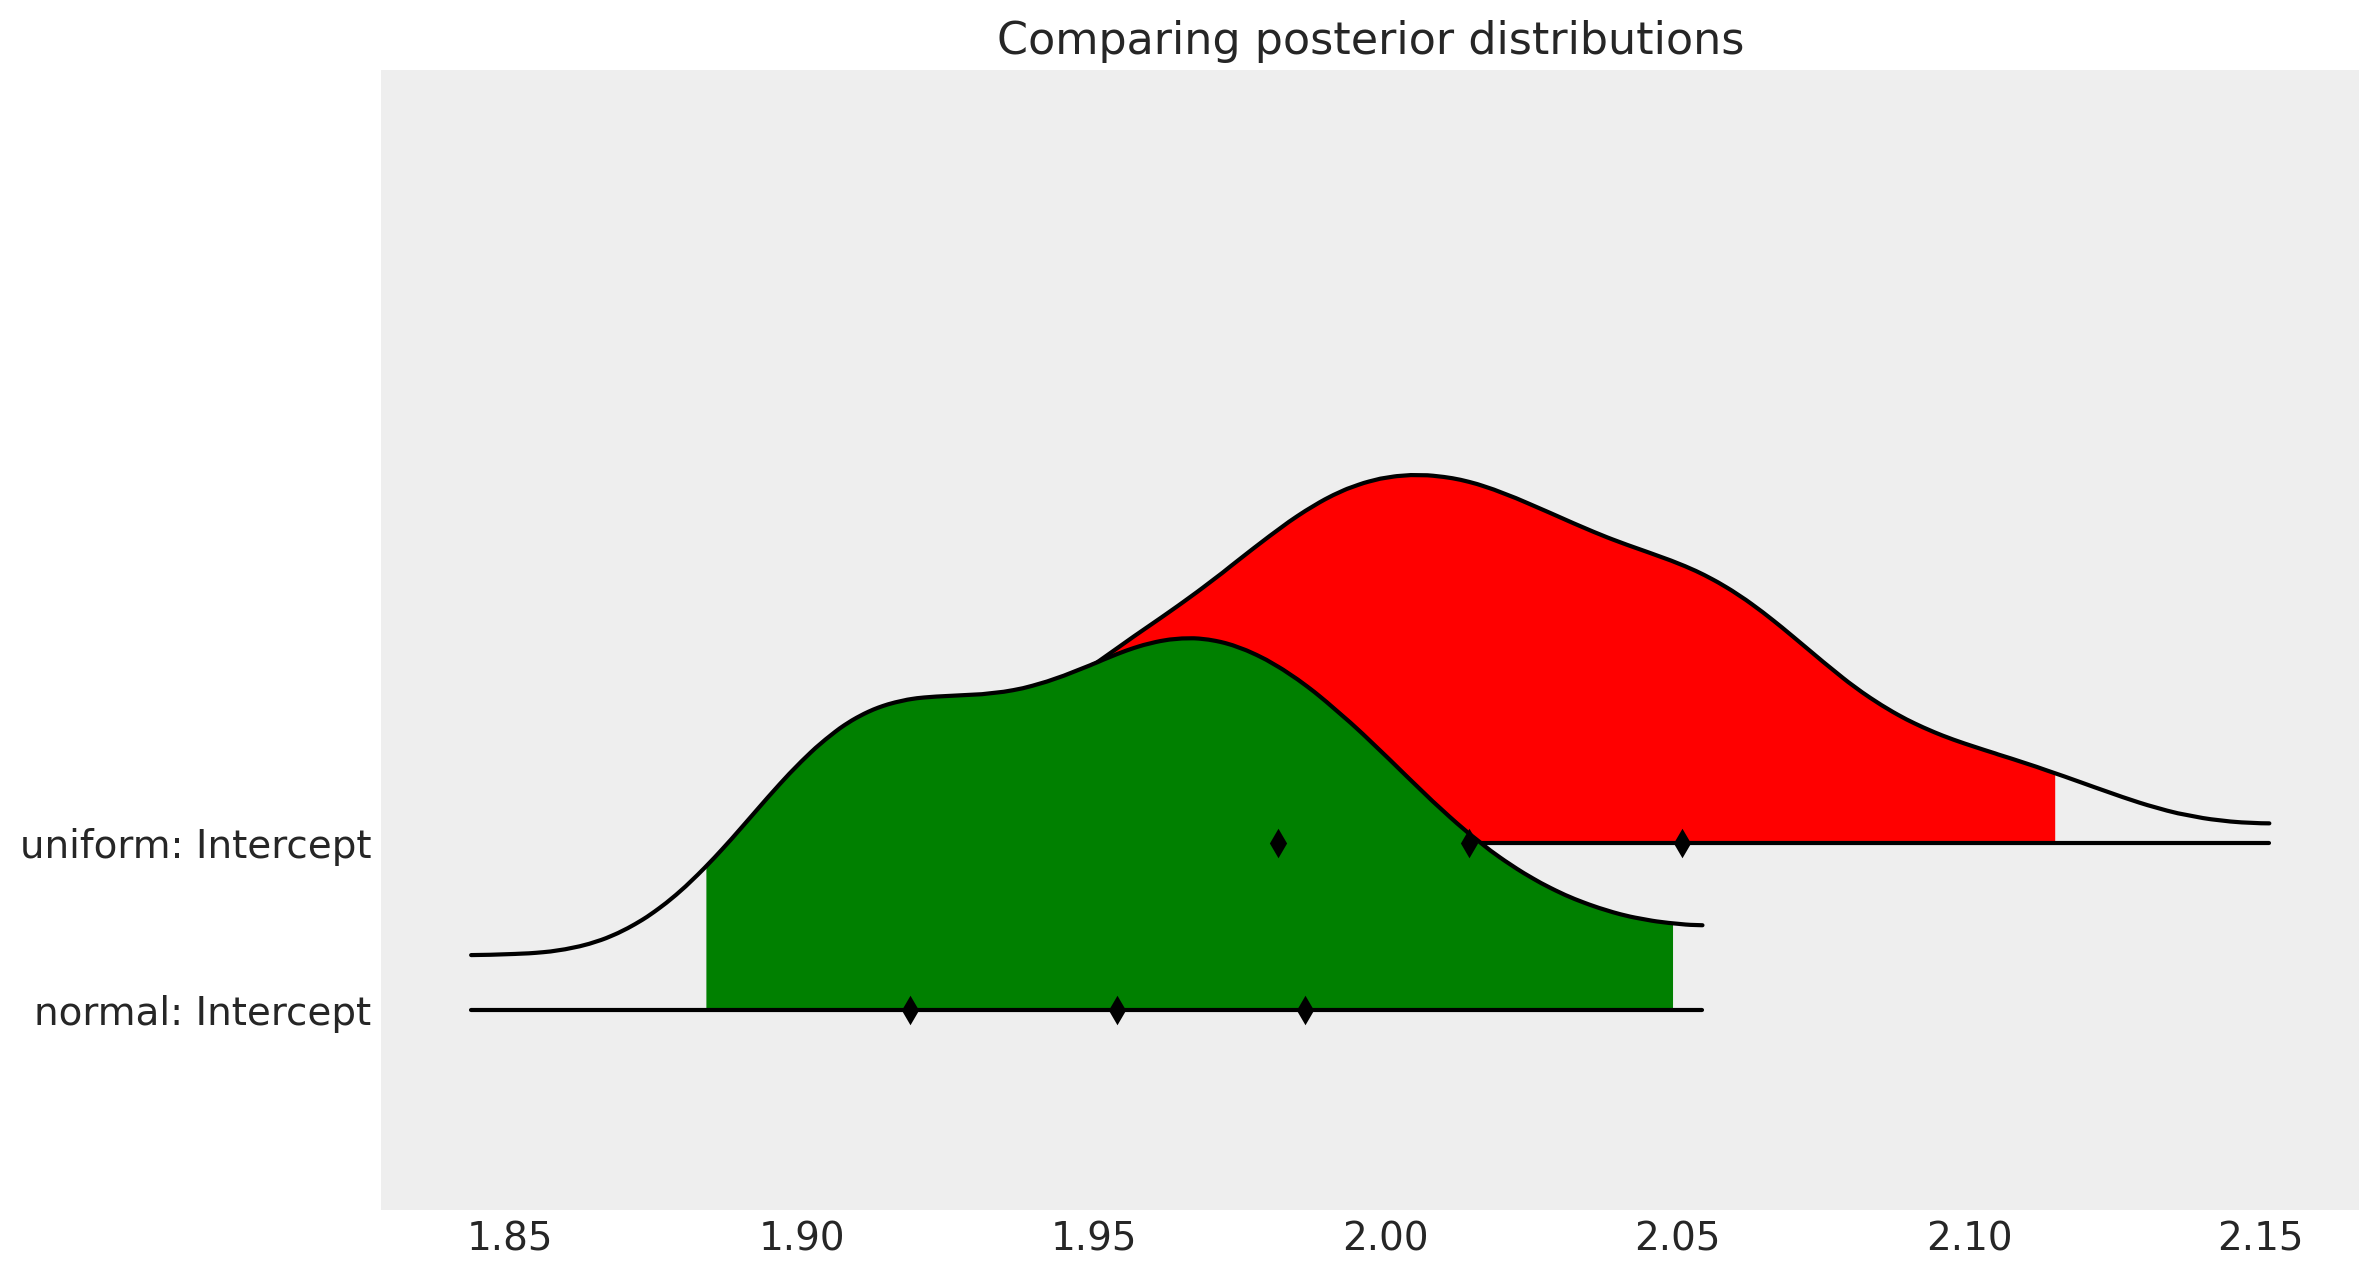

<Figure size 700x700 with 0 Axes>

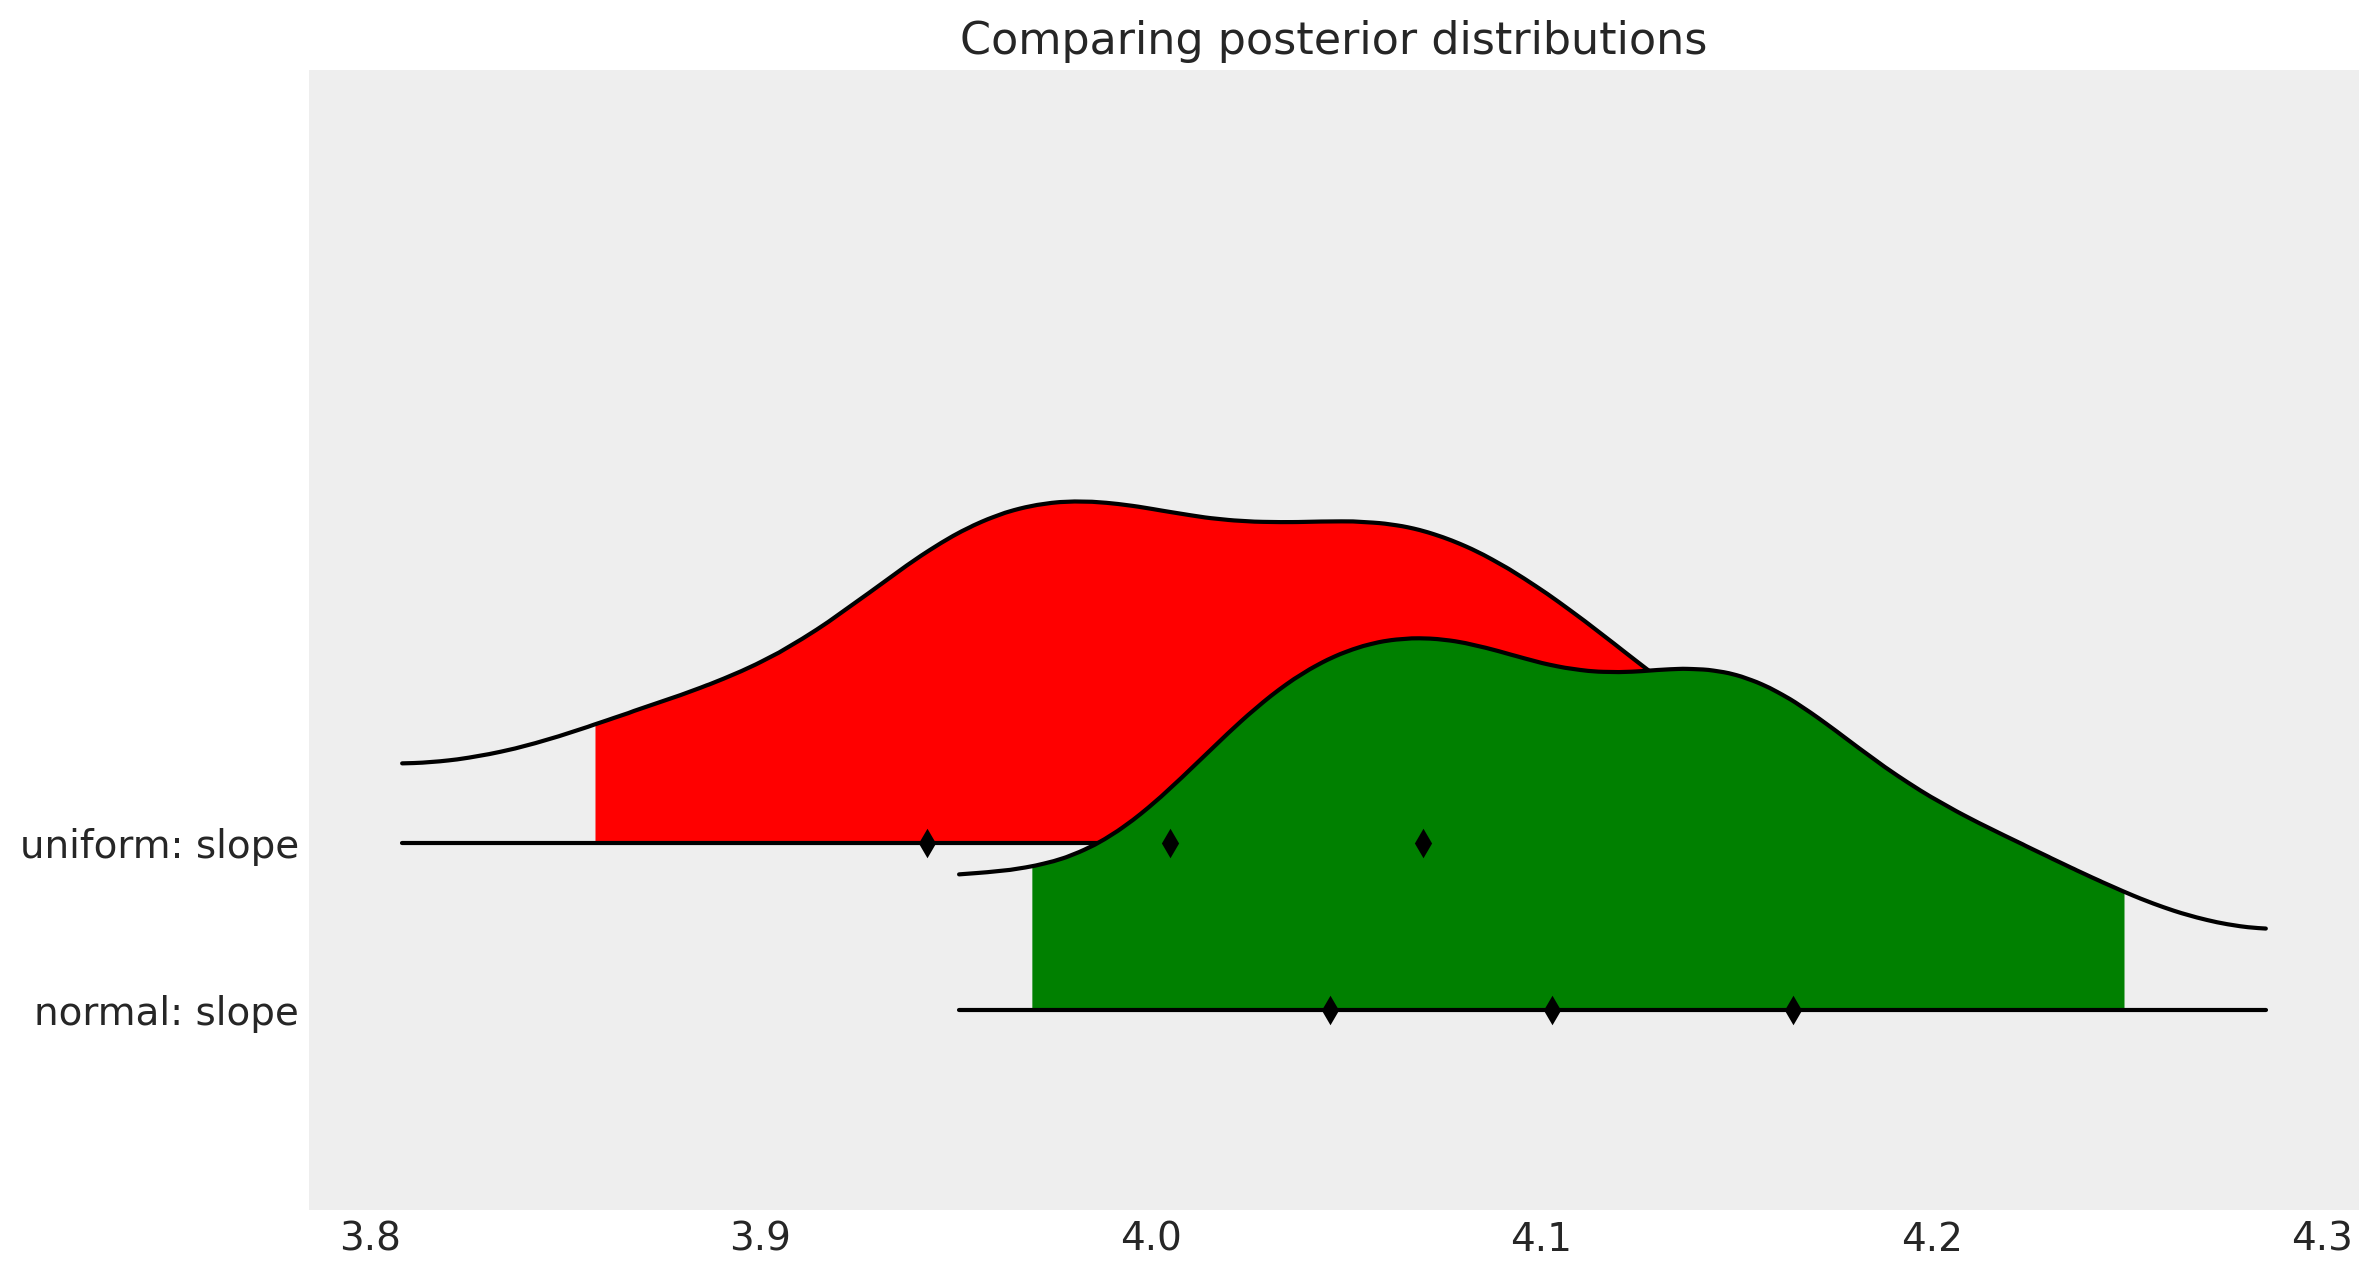

In [18]:
### more examples - comparing posteriors for different prior distributions, large data regime

m_names = ['uniform', 'normal']
traces = []

for i in range(len(m_names)):
    x,y,y_true = generate_data(data_size=500)
    trace = sampler(x,y, chains = 1, prior = m_names[i])
    traces.append(trace)
   
graph_comparisons(traces,m_names)  

## Investigating the credible region

How 'accurate' are the credible regions? How well does the observed coverage match the ideal credible region? 

We expect the correct value to be in a 95% credible region 95% of the time, but is this actually the case in the limit of a finite amount of data?

Here we perform several trials generating several posteriors for the initial linear model described above and calculate how many times the true value is in the credible region, for a range of credible regions (i.e. %5, 15%...95%). 

This is done for a) a large dataset (n = 200), b) a small dataset (n = 10) with Normal priors described above, and c) a small dataset (n=10) with Uniform priors described above.

The results indicate that for 100 trials there is not much of a difference between the observed coverage and the ideal credible region for the large dataset. Using a small dataset and different priors had a similar result. 

This suggests that the credible regions are fairly robust over different dataset sizes and prior distributions choices. 

In [43]:
### Verifying credible regions - how well does the observed coverage match the ideal credible region?

# hide output messages from pymc3 (caution: can also hide warnings)
import logging, sys
logging.disable(sys.maxsize)


### go through different credible regions (i.e. 5%,15%...95%) and calculate the observed 'covereage' 
def verify_cr(p):  # p = [n iter, data size, prior dist.]
        
    regions = [(i*10 + 5)/100 for i in range(10)]
    results = []
    a = 4 
    b = 2
    s = 0.5

    a_count = [0 for i in range(len(regions))]
    b_count = [0 for i in range(len(regions))]
    s_count = [0 for i in range(len(regions))]
    n = p[0]

    for i in range(n):

        if i%10 == 0:
            print(f'iteration {i}')

        ### generate dataset: slope = 4, intercept = 2, sigma = 0.5
        ### user parameters for data size and prior dist.
        
        x,y,y_true = generate_data(data_size = p[1])
        trace = sampler(x,y, chains = 1, prior = p[2], v=False) 

        ### calculate credible region (HDI) and check if the true values are inside
        for i in range(len(regions)):
            hdi=stats.hpd(trace, hdi_prob=regions[i])
            a_low = hdi['slope'][0]
            a_high = hdi['slope'][1]
            b_low = hdi['Intercept'][0]
            b_high = hdi['Intercept'][1]
            s_low = hdi['sigma'][0]
            s_high = hdi['sigma'][1]

            if a_low <= a <= a_high:
                a_count[i] = a_count[i] + 1 
            if b_low <= b <= b_high:
                b_count[i] = b_count[i] + 1  
            if s_low <= s <= s_high:
                s_count[i] = s_count[i] + 1 

    # print observed coverage for each region (i.e. 5%, 15%....95%)
    print(f'slope: {np.asarray(a_count)/(1.0*n)}, intercept: {np.asarray(b_count)/(1.0*n)}, sigma: {np.asarray(s_count)/(1.0*n)}')
    
 
    # return credible regions
    cr = [np.asarray(a_count)/(1.0*n), np.asarray(b_count)/(1.0*n), np.asarray(s_count)/(1.0*n)]

    return cr


In [47]:
def plot_cr(x,y_list,labels):  # plot credible region for each parameter


    for i in range(len(y)):
        plt.figure()
        plt.title(f'Confidence intervals: {labels[i+1]}, {labels[0]} trials')
        plt.xlabel(f'ideal credible region')
        plt.ylabel(f'observed coverage') 
        plt.plot(x,x, '--', label='ref.')
        plt.plot(x, y[i][0], label = 'large dataset, Normal prior' )
        plt.plot(x, y[i][1], label = 'small dataset, Normal prior' )
        plt.plot(x, y[i][2], label = 'small dataset, Uniform prior')
        plt.legend()
        plt.show()

In [28]:
### examine credible regions: large dataset

p = [100, 200, 'normal']  # [n iterations, data size, posterior]
cr1 = verify_cr(p)

iteration 0
iteration 10
iteration 20
iteration 30
iteration 40
iteration 50
iteration 60
iteration 70
iteration 80
iteration 90
slope: [0.01 0.1  0.19 0.28 0.38 0.5  0.6  0.72 0.83 0.91], intercept: [0.   0.1  0.2  0.38 0.45 0.49 0.59 0.68 0.76 0.88], sigma: [0.02 0.04 0.14 0.27 0.37 0.48 0.58 0.71 0.81 0.96]


In [29]:
### examine credible regions: small dataset, normal prior

p = [100, 10, 'normal']  # [n iterations, data size, posterior]
cr2 = verify_cr(p)

iteration 0
iteration 10
iteration 20
iteration 30
iteration 40
iteration 50
iteration 60
iteration 70
iteration 80
iteration 90
slope: [0.01 0.12 0.22 0.28 0.39 0.53 0.61 0.73 0.85 0.94], intercept: [0.01 0.11 0.19 0.33 0.48 0.58 0.68 0.78 0.88 0.93], sigma: [0.03 0.13 0.25 0.33 0.45 0.53 0.65 0.74 0.84 0.91]


In [30]:
### examine credible regions: small dataset, uniform prior

p = [100, 10, 'uniform']  # [n iterations, data size, posterior]
cr3 = verify_cr(p)

iteration 0
iteration 10
iteration 20
iteration 30
iteration 40
iteration 50
iteration 60
iteration 70
iteration 80
iteration 90
slope: [0.   0.08 0.14 0.3  0.4  0.5  0.6  0.71 0.8  0.92], intercept: [0.   0.09 0.18 0.28 0.45 0.57 0.66 0.7  0.85 0.97], sigma: [0.02 0.11 0.22 0.38 0.54 0.59 0.68 0.78 0.82 0.9 ]


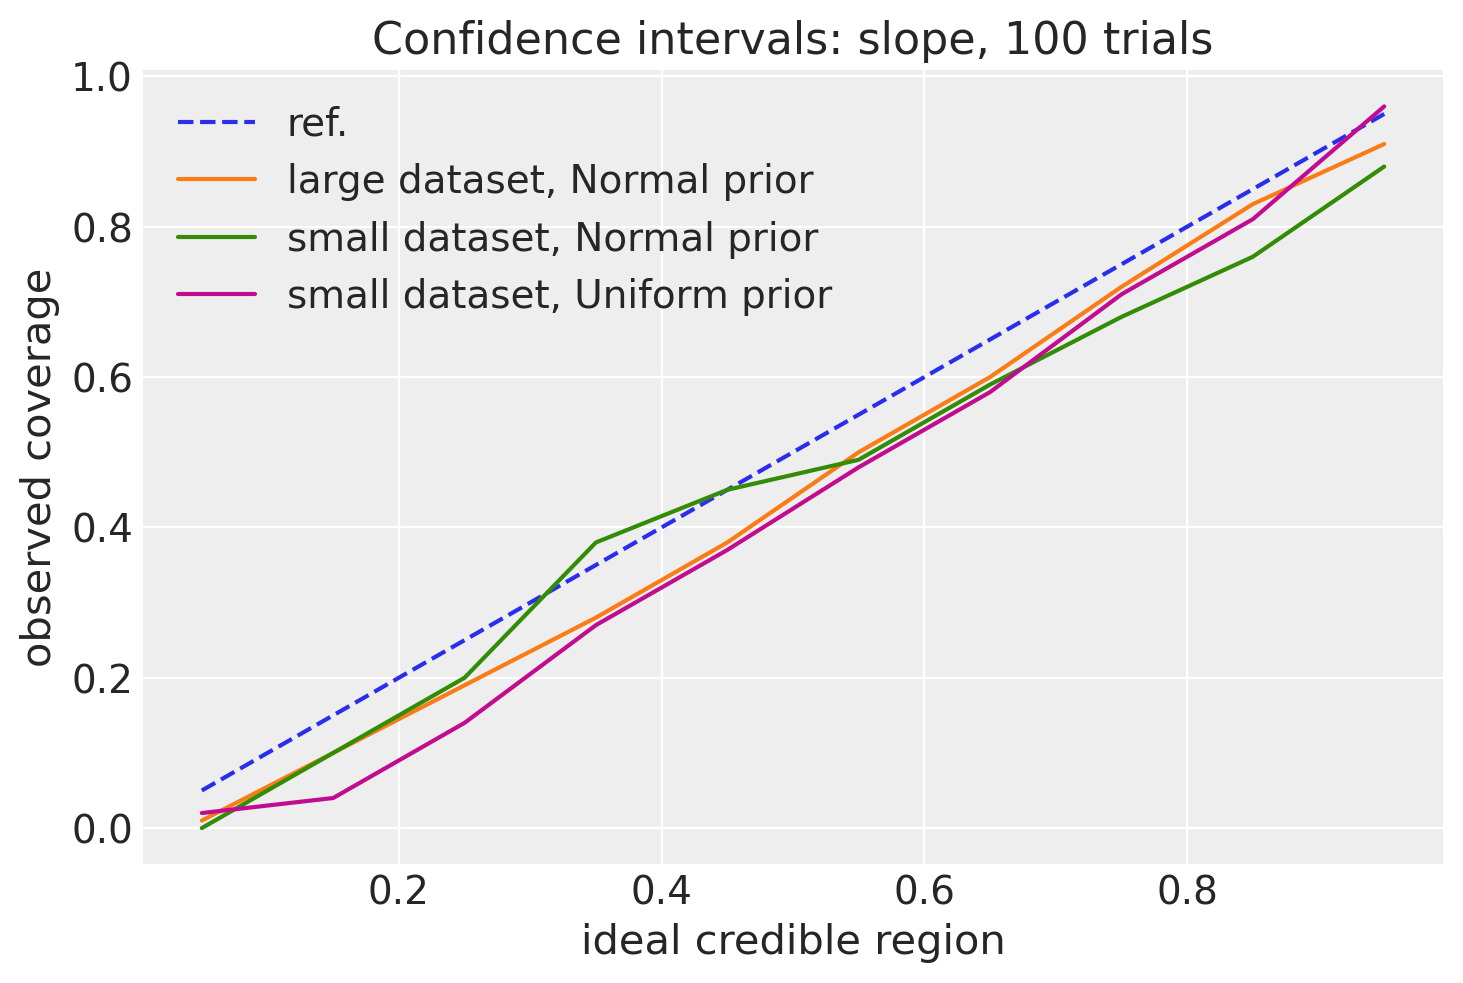

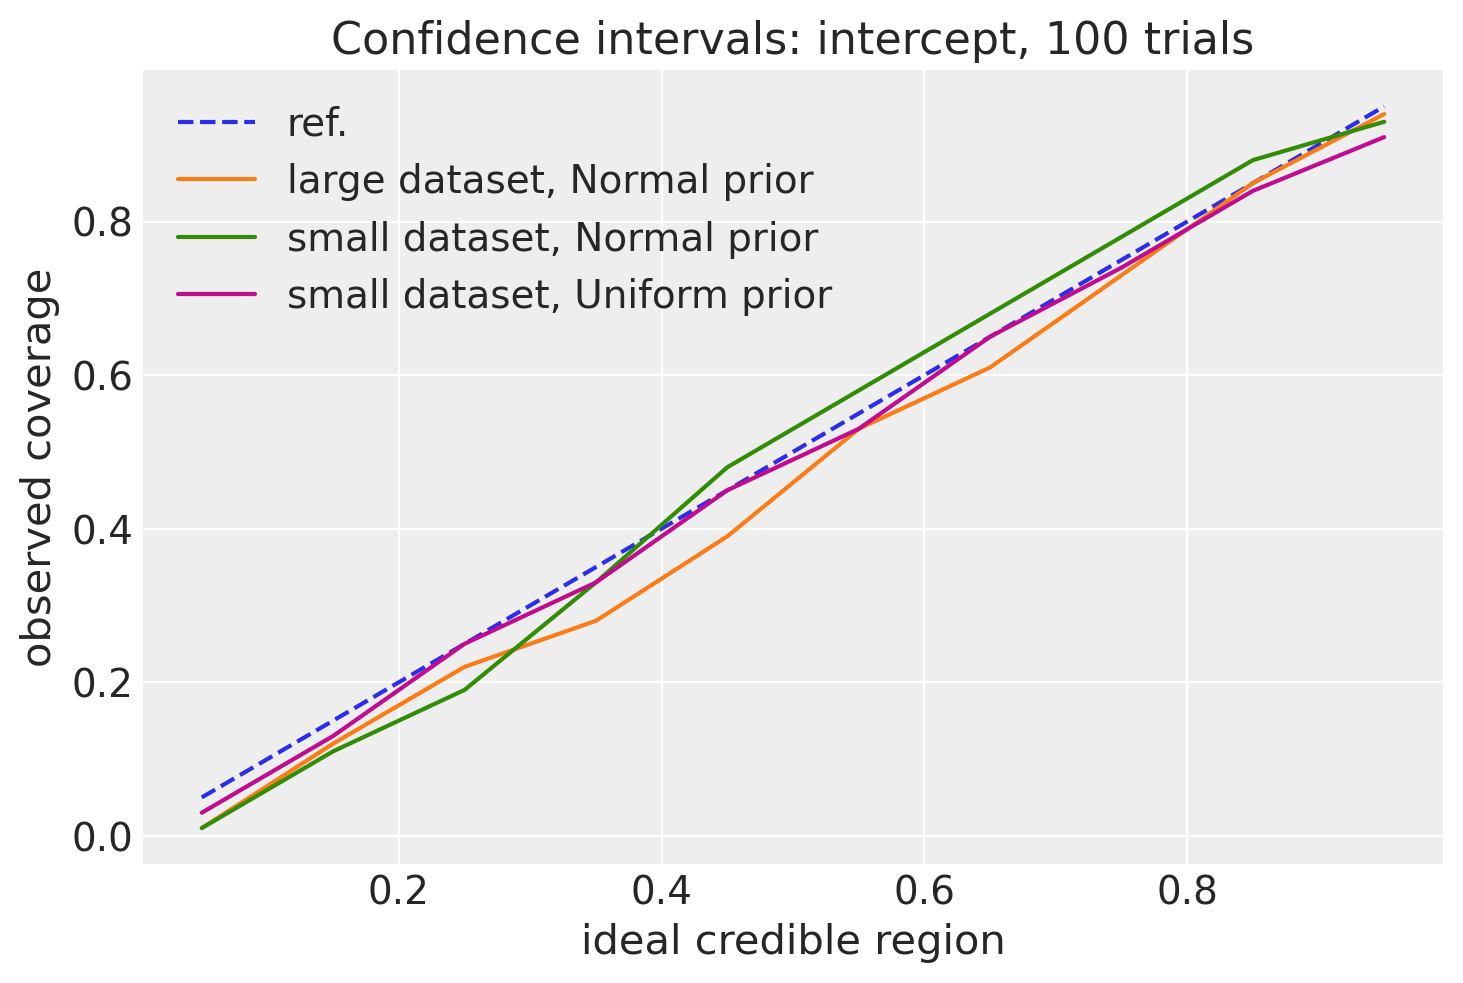

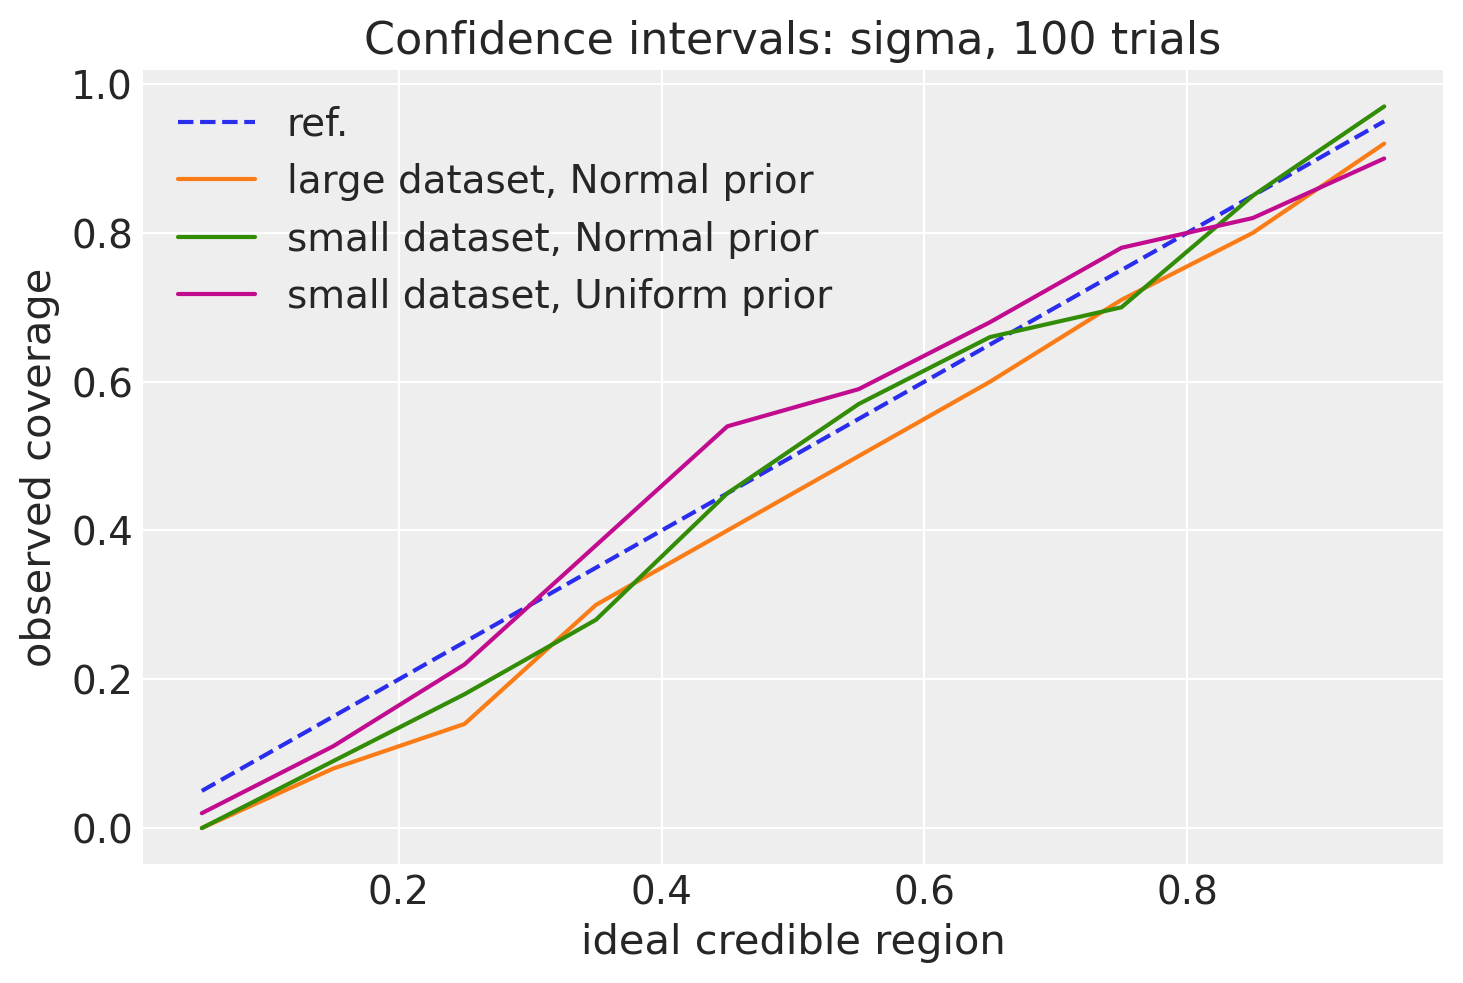

In [48]:
# plot comparisons
x = [(i*10 + 5)/100 for i in range(10)]
y = [cr1, cr2, cr3]
labels = [100, 'slope', 'intercept', 'sigma']

plot_cr(x, y, labels)